# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

# Goals: 


The goal of this project is to have you complete a very common real-world task in regard to time series modeling. However, real world problems often come with a significant degree of ambiguity, which requires you to use your knowledge of statistics and data science to think critically about and answer. While the main task in this project is time series modeling, that isn't the overall goal -- it is important to understand that time series modeling is a tool in your toolbox, and the forecasts it provides you are what you'll use to answer important questions.

In short, to pass this project, demonstrating the quality and thoughtfulness of your overall recommendation is at least as important as successfully building a time series model!

# Data Understanding

Data info:

    RegiondID - zillow's own ID
    RegionName - Zipcodes, renamed to zipcode
    City - City
    State - State 
    Metro - Metropolitan area
    CountyName- - County
    SizeRank - ranking of zipcode sizes?
    The rest - datas and their median monthly house sales

In [272]:
#"The expectations of life depend upon diligence; the mechanic that would perfect his work must first sharpen his tools."
#- Confucius

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

import xgboost as xgb

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, \
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from statsmodels.tsa.stattools import adfuller


In [227]:
df.columns.to_list()

['RegionID',
 'zipcode',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002

In [274]:
df = pd.read_csv('zillow_data.zip')
df = df.rename(columns={'RegionName': 'zipcode'})
df['pct_change'] = ((df['2018-04'] / df['1996-04']) - 1)
# df['pct_change'] = ((df['2018-04'] - df['1996-04']) / df['1996-04']) * 100

In [275]:
df

#last columns are in a "Wide" format 

RegionID  zipcode                 City State              Metro  \
0         84654    60657              Chicago    IL            Chicago   
1         90668    75070             McKinney    TX  Dallas-Fort Worth   
2         91982    77494                 Katy    TX            Houston   
3         84616    60614              Chicago    IL            Chicago   
4         93144    79936              El Paso    TX            El Paso   
...         ...      ...                  ...   ...                ...   
14718     58333     1338             Ashfield    MA    Greenfield Town   
14719     59107     3293            Woodstock    NH          Claremont   
14720     75672    40404                Berea    KY           Richmond   
14721     93733    81225  Mount Crested Butte    CO                NaN   
14722     95851    89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-08  \
0           Cook         1  334200.0  335400.0  336500.0  ...  1007500   
1         Collin         2  235700.0  236900.0  236700.0  ...   310000   
2         Harris         3  210400.0  212200.0  212200.0  ...   320600   
3           Cook         4  498100.0  500900.0  503100.0  ...  1287700   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119400   
...          ...       ...       ...       ...       ...  ...      ...   
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   217700   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   208400   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   122800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   671200   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   336400   

       2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  \
0      1007800  1009600  1013300  1018700  1024400  1030700  1033800  1030600   
1       312500   314100   315000   316600   318100   319600   321100   321800   
2       320200   320400   320800   321200   321200   323000   326900   329900   
3      1287400  1291500  1296600  1299000  1302700  1306400  1308500  1307000   
4       120000   120300   120300   120300   120300   120500   121000   121500   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14718   218600   218500   218100   216400   213100   209800   209200   209300   
14719   212200   215200   214300   213100   213700   218300   222700   225800   
14720   124600   126700   128800   130600   131700   132500   133000   133400   
14721   682400   695600   695500   694700   706400   705300   681500   664400   
14722   339700   343800   346800   348900   350400   353000   356000   357200   

       pct_change  
0        2.083782  
1        0.365295  
2        0.567966  
3        1.623971  
4        0.571798  
...           ...  
14718    1.212474  
14719    1.435814  
14720    1.336252  
14721    2.476714  
14722    1.024943  

[14723 rows x 273 columns]

In [276]:
df.info

<bound method DataFrame.info of        RegionID  zipcode                 City State              Metro  \
0         84654    60657              Chicago    IL            Chicago   
1         90668    75070             McKinney    TX  Dallas-Fort Worth   
2         91982    77494                 Katy    TX            Houston   
3         84616    60614              Chicago    IL            Chicago   
4         93144    79936              El Paso    TX            El Paso   
...         ...      ...                  ...   ...                ...   
14718     58333     1338             Ashfield    MA    Greenfield Town   
14719     59107     3293            Woodstock    NH          Claremont   
14720     75672    40404                Berea    KY           Richmond   
14721     93733    81225  Mount Crested Butte    CO                NaN   
14722     95851    89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-08  \
0    

In [277]:
df['RegionID'].value_counts()

73724     1
70551     1
99221     1
76688     1
82829     1
         ..
71176     1
91654     1
65029     1
100380    1
98304     1
Name: RegionID, Length: 14723, dtype: int64

In [278]:
df.describe()

RegionID       zipcode      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  8.646795e+04  8.665094e+04  8.687208e+04  8.715185e+04   
min    1.160000e+04  1.180000e+04  1.180000e+04  1.200000e+04  1.210000e+04   
25%    6.910000e+04  6.920000e+04  6.937500e+04  6.950000e+04  6.960000e+04   
50%    9.970000e+04  9.970000e+04  9.980000e+04  9.990000e+04  9.995000e+04   
75%    1.432250e+05  1.432250e+05  1.435000e+05  1.437000e+05  1.439000e+05   
max    3.729600e+06  3.754600e+06  3.781800e+06  3.813500e+06  3.849600e+06   

       ...       2017-08       2017-09       2017-10       2017-11  \
count  ...  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   ...  2.748658e+05  2.764646e+05  2.780332e+05  2.795209e+05   
std    ...  3.614678e+05  3.627563e+05  3.644610e+05  3.656003e+05   
min    ...  1.450000e+04  1.470000e+04  1.480000e+04  1.450000e+04   
25%    ...  1.275000e+05  1.282000e+05  1.287000e+05  1.292500e+05   
50%    ...  1.896000e+05  1.905000e+05  1.914000e+05  1.925000e+05   
75%    ...  3.066500e+05  3.085000e+05  3.098000e+05  3.117000e+05   
max    ...  1.870350e+07  1.860530e+07  1.856940e+07  1.842880e+07   

            2017-12       2018-01       2018-02       2018-03       2018-04  \
count  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   2.810953e+05  2.826571e+05  2.843687e+05  2.865114e+05  2.880399e+05   
std    3.670454e+05  3.695727e+05  3.717739e+05  3.724612e+05  3.720544e+05   
min    1.430000e+04  1.410000e+04  1.390000e+04  1.380000e+04  1.380000e+04   
25%    1.299000e+05  1.306000e+05  1.310500e+05  1.319500e+05  1.324000e+05   
50%    1.934000e+05  1.941000e+05  1.950000e+05  1.967000e+05  1.981000e+05   
75%    3.134000e+05  3.151000e+05  3.168500e+05  3.188500e+05  3.211000e+05   
max    1.830710e+07  1.836590e+07  1.853040e+07  1.833770e+07  1.789490e+07   

         pct_change  
count  13684.000000  
mean       1.325605  
std        0.866019  
min       -0.532609  
25%        0.785691  
50%        1.139484  
75%        1.619833  
max       11.189940  

[8 rows x 269 columns]

In [279]:
df.isna().sum()

RegionID         0
zipcode          0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01     

In [280]:
df.dropna(inplace=True)


#Opted for dropping na's because represent 13% loss of total and interpolation or forward/backward filling

In [281]:
#[14723 rows x 272 columns]> / 12895 rows × 272 columns

melted_df = pd.melt(df, id_vars=['RegionID', 'zipcode', 'City', 'State', 'Metro',
                                 'CountyName', 'SizeRank','pct_change'],
                    var_name='Date', value_name='MedianHousingSales')

# 'MedianHousingSales' contains corresponding values for each date and zipcode combination


In [282]:
melted_df

RegionID  zipcode          City State              Metro CountyName  \
0           84654    60657       Chicago    IL            Chicago       Cook   
1           90668    75070      McKinney    TX  Dallas-Fort Worth     Collin   
2           91982    77494          Katy    TX            Houston     Harris   
3           84616    60614       Chicago    IL            Chicago       Cook   
4           93144    79936       El Paso    TX            El Paso    El Paso   
...           ...      ...           ...   ...                ...        ...   
3417170     99032    97028  Rhododendron    OR           Portland  Clackamas   
3417171     58333     1338      Ashfield    MA    Greenfield Town   Franklin   
3417172     59107     3293     Woodstock    NH          Claremont    Grafton   
3417173     75672    40404         Berea    KY           Richmond    Madison   
3417174     95851    89155      Mesquite    NV          Las Vegas      Clark   

         SizeRank  pct_change     Date  MedianHousingSales  
0               1    2.083782  1996-04            334200.0  
1               2    0.365295  1996-04            235700.0  
2               3    0.567966  1996-04            210400.0  
3               4    1.623971  1996-04            498100.0  
4               5    0.571798  1996-04             77300.0  
...           ...         ...      ...                 ...  
3417170     14717    1.564611  2018-04            349300.0  
3417171     14719    1.212474  2018-04            209300.0  
3417172     14720    1.435814  2018-04            225800.0  
3417173     14721    1.336252  2018-04            133400.0  
3417174     14723    1.024943  2018-04            357200.0  

[3417175 rows x 10 columns]

In [283]:
# Reshape
reshaped_df = df.melt(id_vars=['RegionID', 'zipcode', 'City', 'State', 'Metro',
                               'CountyName', 'SizeRank', 'pct_change'],
                      var_name='Date', value_name='MedianHousingSales')

#'Date' column to datetime format
reshaped_df['Date'] = pd.to_datetime(reshaped_df['Date'], format='%Y-%m')

# Pivot
final_df = reshaped_df.pivot_table(index=['Date', 'RegionID', 'zipcode', 'City', 'State', 'Metro',
                                          'CountyName', 'SizeRank', 'pct_change'],
                                   values='MedianHousingSales')

# Reset the index to make 'Date' and other columns separate columns
final_df = final_df.reset_index()


In [284]:
final_df

Date  RegionID  zipcode          City State           Metro  \
0       1996-04-01     58196     1001        Agawam    MA     Springfield   
1       1996-04-01     58197     1002       Amherst    MA     Springfield   
2       1996-04-01     58200     1005         Barre    MA       Worcester   
3       1996-04-01     58201     1007   Belchertown    MA     Springfield   
4       1996-04-01     58202     1008     Blandford    MA     Springfield   
...            ...       ...      ...           ...   ...             ...   
3417170 2018-04-01    677175    84009  South Jordan    UT  Salt Lake City   
3417171 2018-04-01    698721    86005     Flagstaff    AZ       Flagstaff   
3417172 2018-04-01    738092    97003     Beaverton    OR        Portland   
3417173 2018-04-01    753843    97703          Bend    OR            Bend   
3417174 2018-04-01    753844    29486   Summerville    SC      Charleston   

         CountyName  SizeRank  pct_change  MedianHousingSales  
0           Hampden      5851    0.977011            113100.0  
1         Hampshire      4200    1.194410            161000.0  
2         Worcester     11214    1.140640            103100.0  
3         Hampshire      6851    1.028486            133400.0  
4           Hampden     14548    0.822979            117500.0  
...             ...       ...         ...                 ...  
3417170   Salt Lake      4654    1.444182            413800.0  
3417171    Coconino      5836    2.119746            393400.0  
3417172  Washington      3950    1.587838            344700.0  
3417173   Deschutes      2804    2.125336            581000.0  
3417174  Dorchester      3188    1.648383            188300.0  

[3417175 rows x 10 columns]

# Calculating states with highest mean change

In [186]:
def microplot(data, X, y_sort, limit=20, **kwargs):
    '''
    data : dataframe
    x : x axis value
    y_sort : y axis values and what the data gets sorted by
    limit : limt for x output, default is 20
    '''
    
    df_sorted = data.sort_values(by=y_sort, ascending=False, inplace=False)[:limit]
    x_order = df_sorted[X].values.tolist()
    fig, ax = plt.subplots(figsize=(18,12))
    ax = sns.barplot(x= X, y= y_sort, data=df_sorted, palette= 'YlOrRd_r', order=x_order, **kwargs)
    ax.set_title(f'{y_sort} vs. {X}', fontsize=15)
    ax.set_xlabel(data[X].name, fontsize=15)
    ax.set_ylabel(y_sort, fontsize=15)

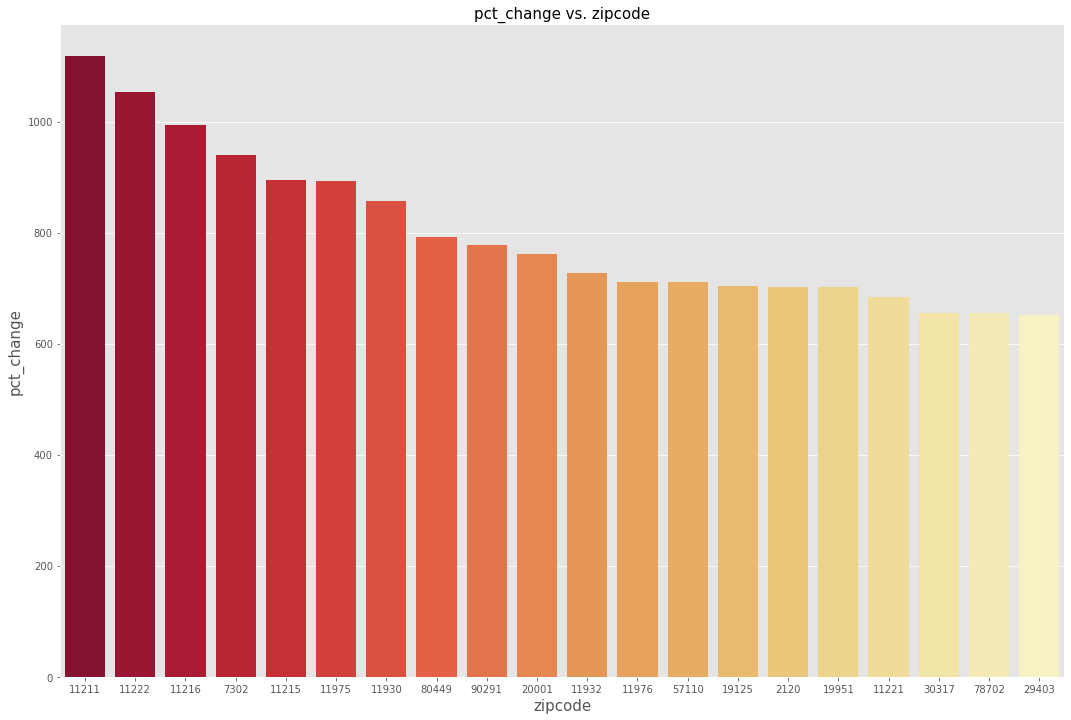

In [189]:
microplot(df, 'zipcode', 'pct_change')

In [285]:
def macroplot(data, group, y, limit=None ,**kwargs):
    '''
    group is the groupby, y is the what aggregate by so price, size
    data : dataframe
    group : groupby column
    y : y column or target
    limit : limit for x output
    '''
    states_df = data.groupby(by= group)[y].mean()
    df_sorted = states_df.sort_values(ascending=False)[:limit]
    x_order = df_sorted.index.tolist()
        
    fig, ax = plt.subplots(figsize=(18,12))
    ax = sns.barplot(x=df_sorted.index, y= df_sorted.values, palette= 'YlOrRd_r', order=x_order, **kwargs)
    ax.set_title(f'{y} vs. {group}', fontsize=15)
    ax.set_xlabel(group, fontsize=15)
    ax.set_ylabel(y, fontsize=15)

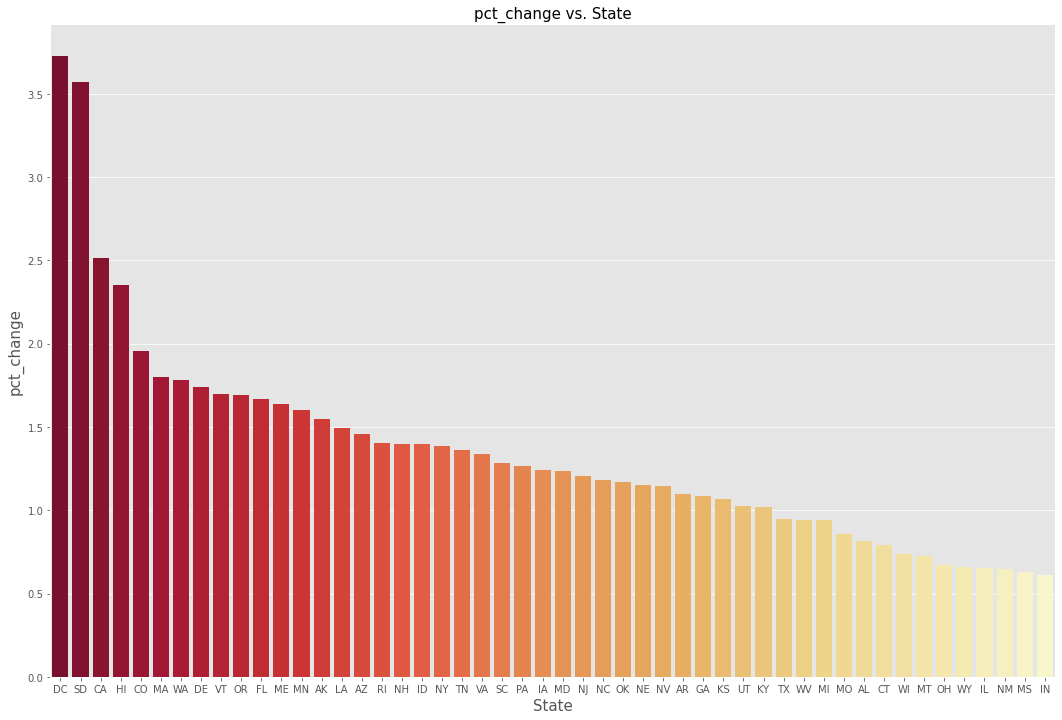

In [286]:
macroplot(df, 'State', 'pct_change')

In [292]:
(10 /4 ) - 1

1.5

In [290]:
((10 - 4) / 4)

1.5

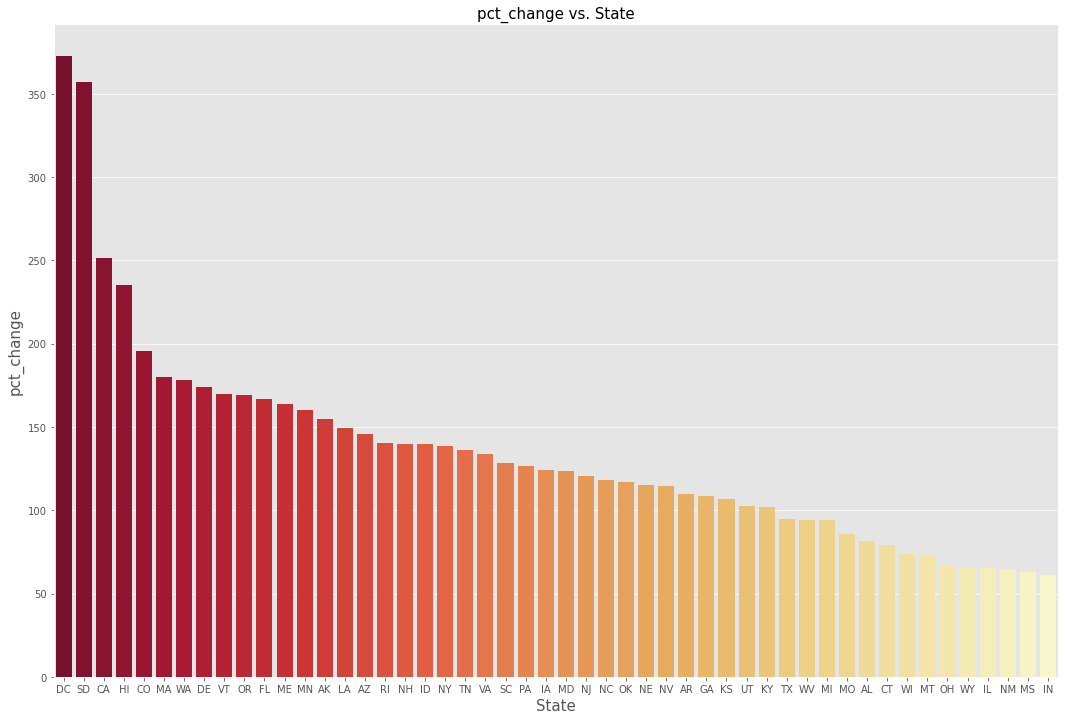

In [206]:
macroplot(final_df, 'State', 'pct_change')

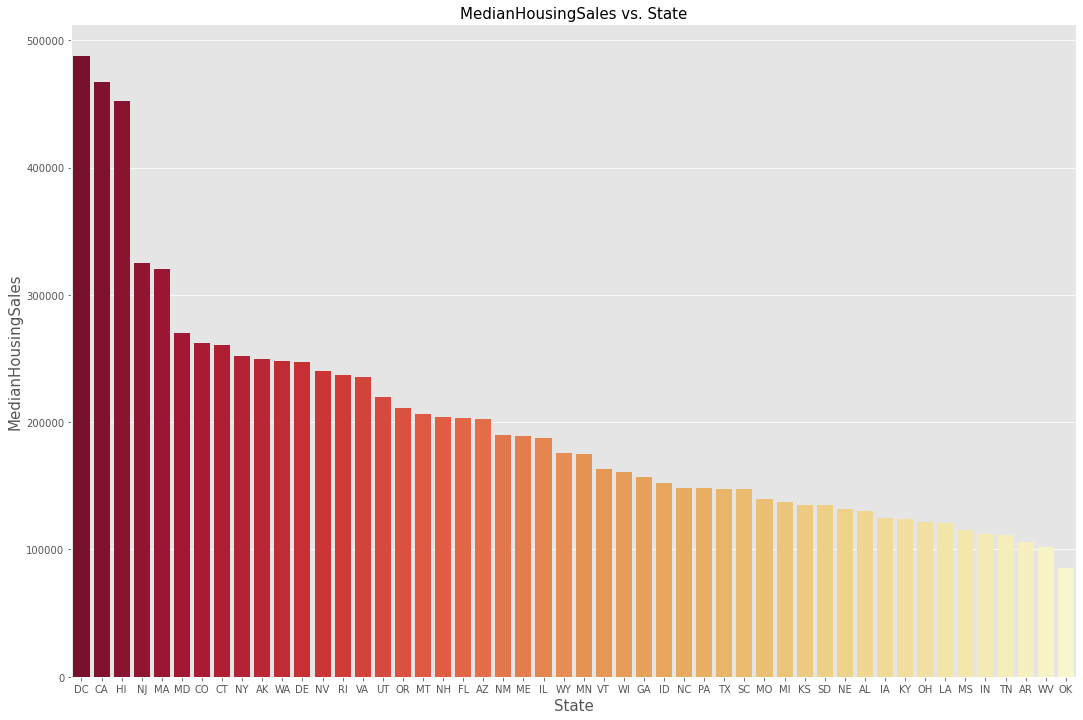

In [207]:
macroplot(final_df, 'State', 'MedianHousingSales')

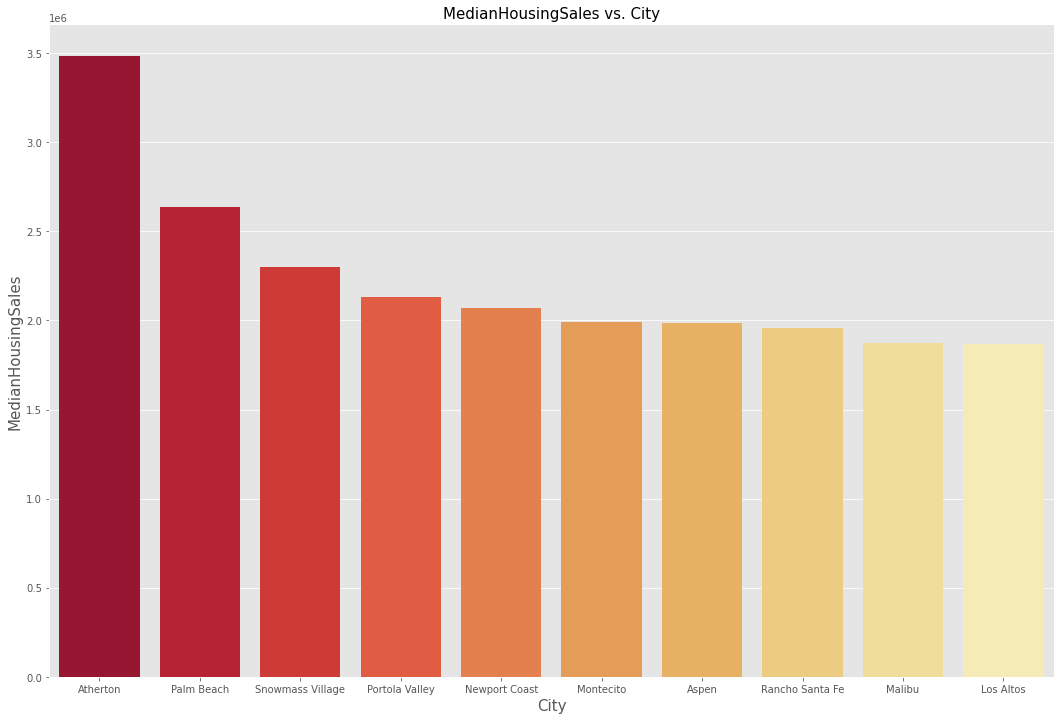

In [215]:
macroplot(final_df, 'City', 'MedianHousingSales', limit=10)

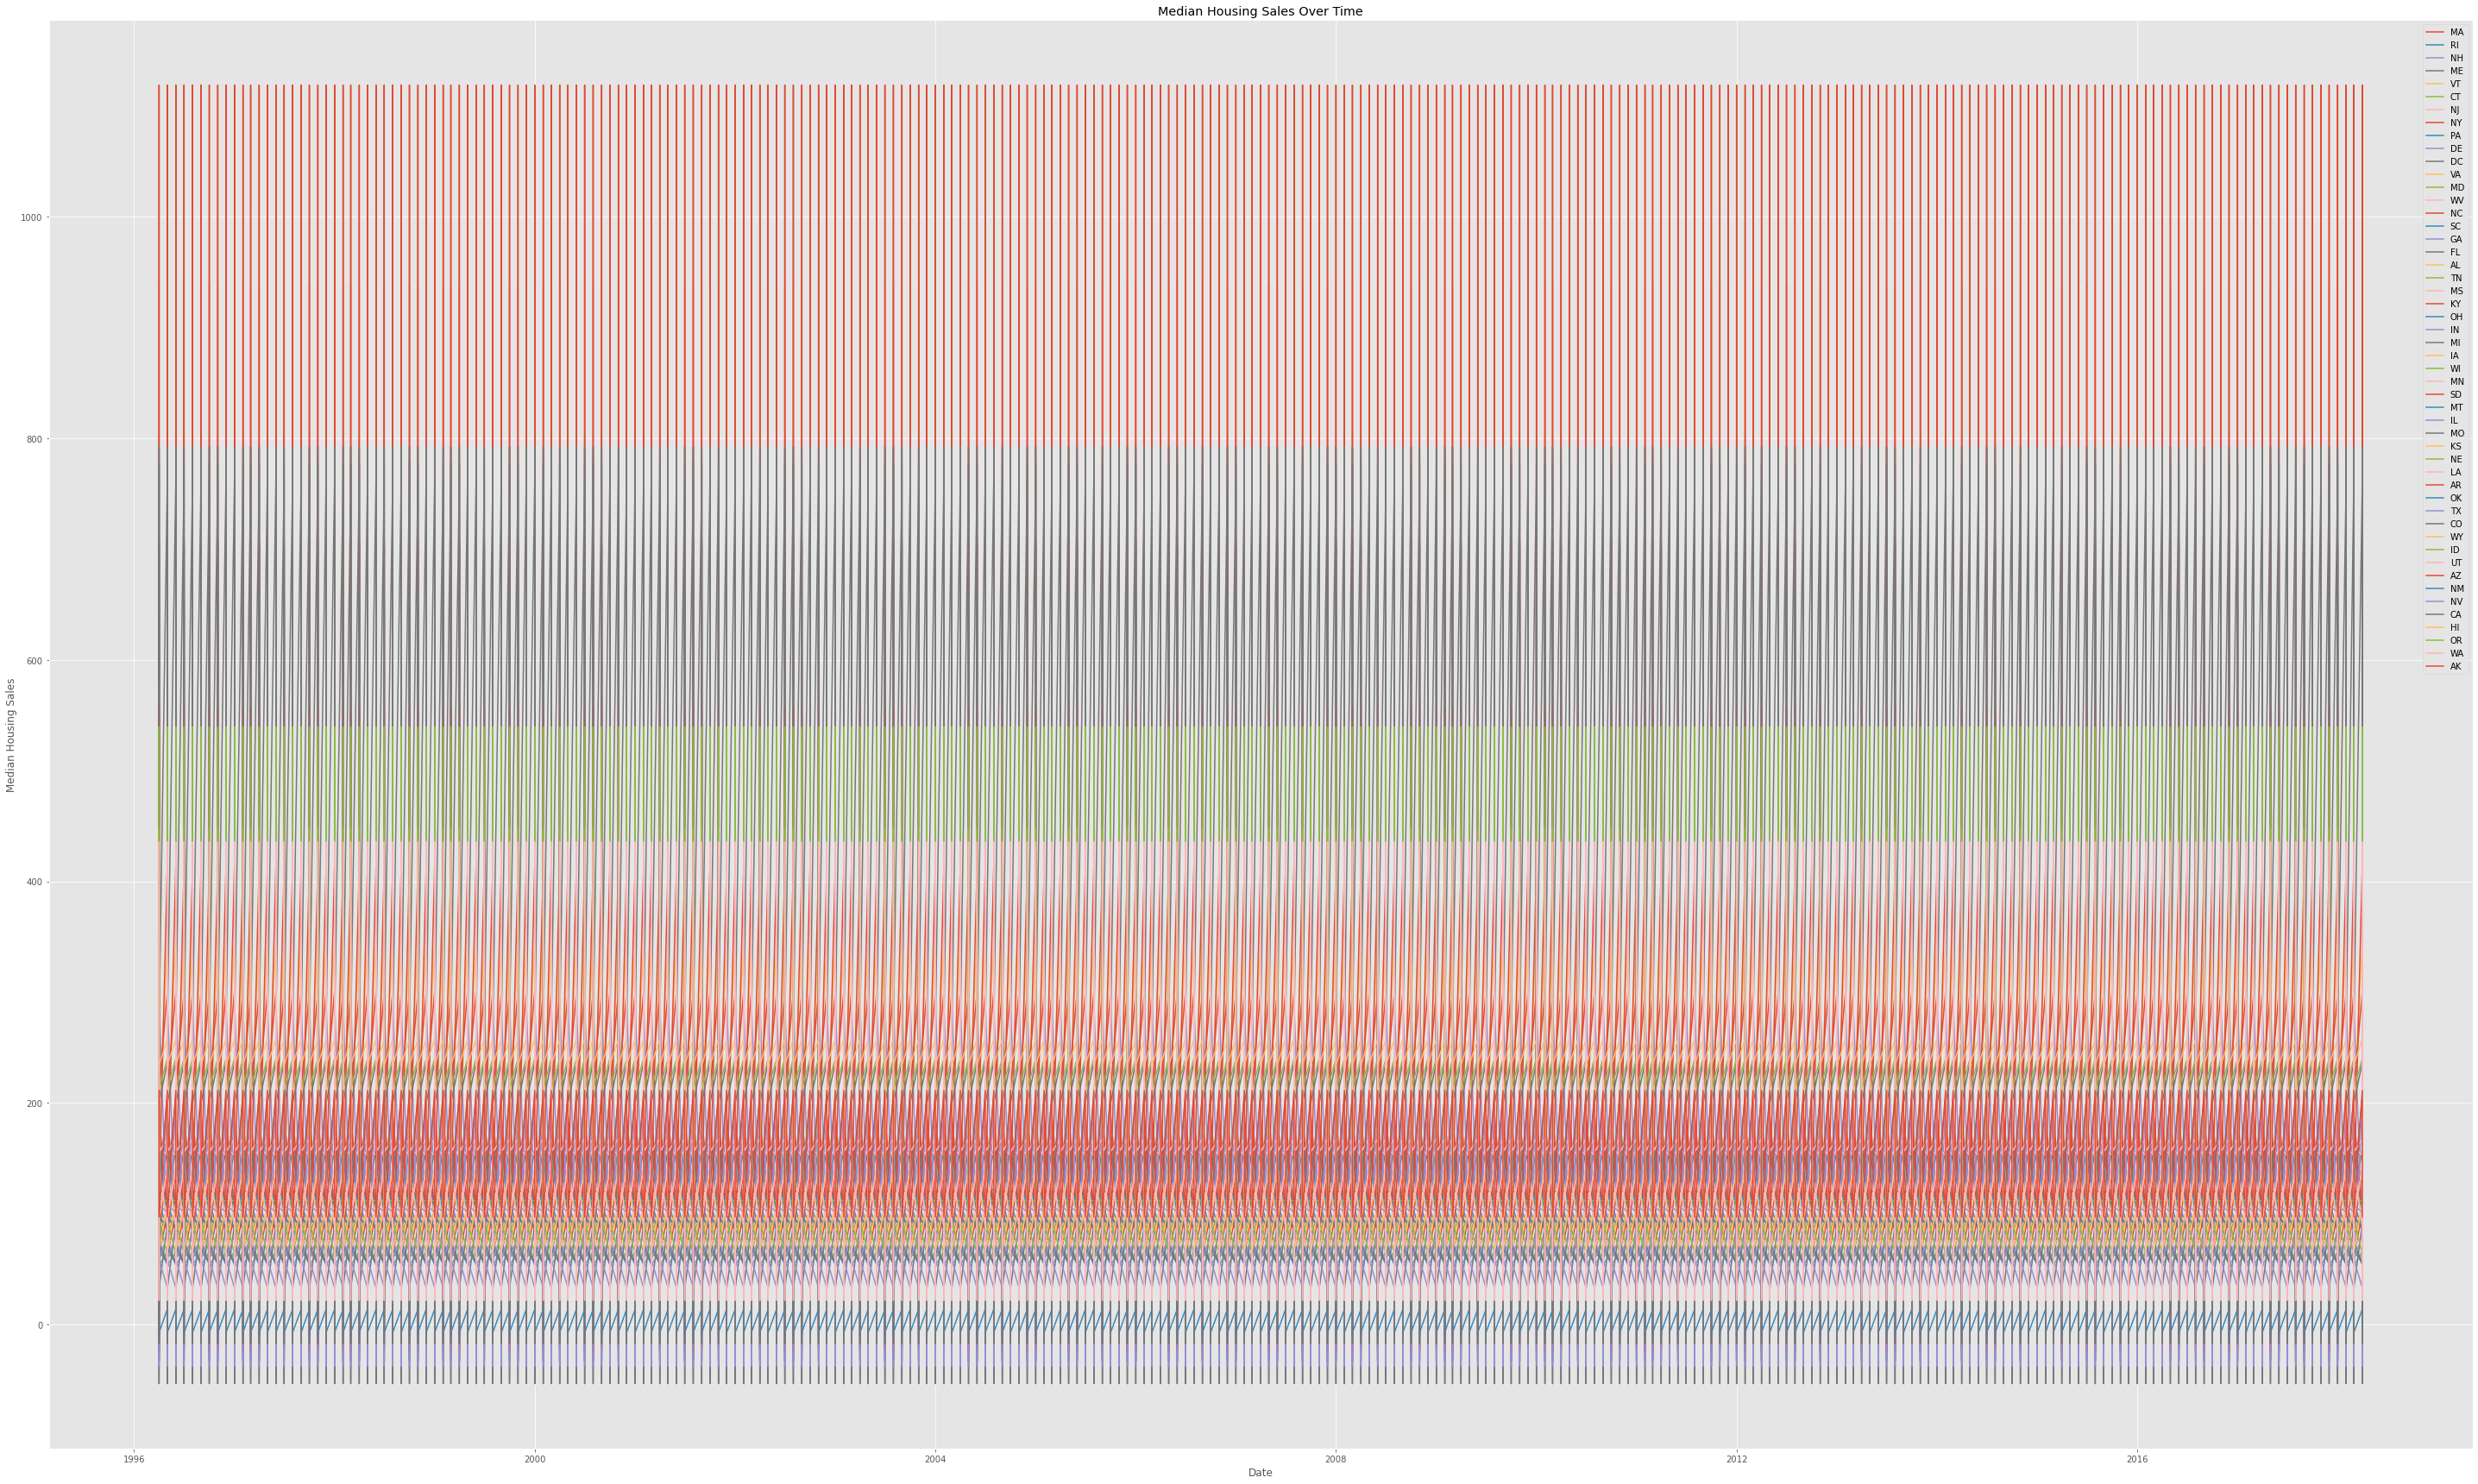

In [223]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 24))

# Plotting
for region in final_df['State'].unique():
    data = final_df[final_df['State'] == region]
    plt.plot(data['Date'], data['pct_change'], label=region)

plt.xlabel('Date')
plt.ylabel('Median Housing Sales')
plt.title('Median Housing Sales Over Time')
plt.legend()
plt.tight_layout()  # Ensures proper spacing of the plot elements
plt.show()

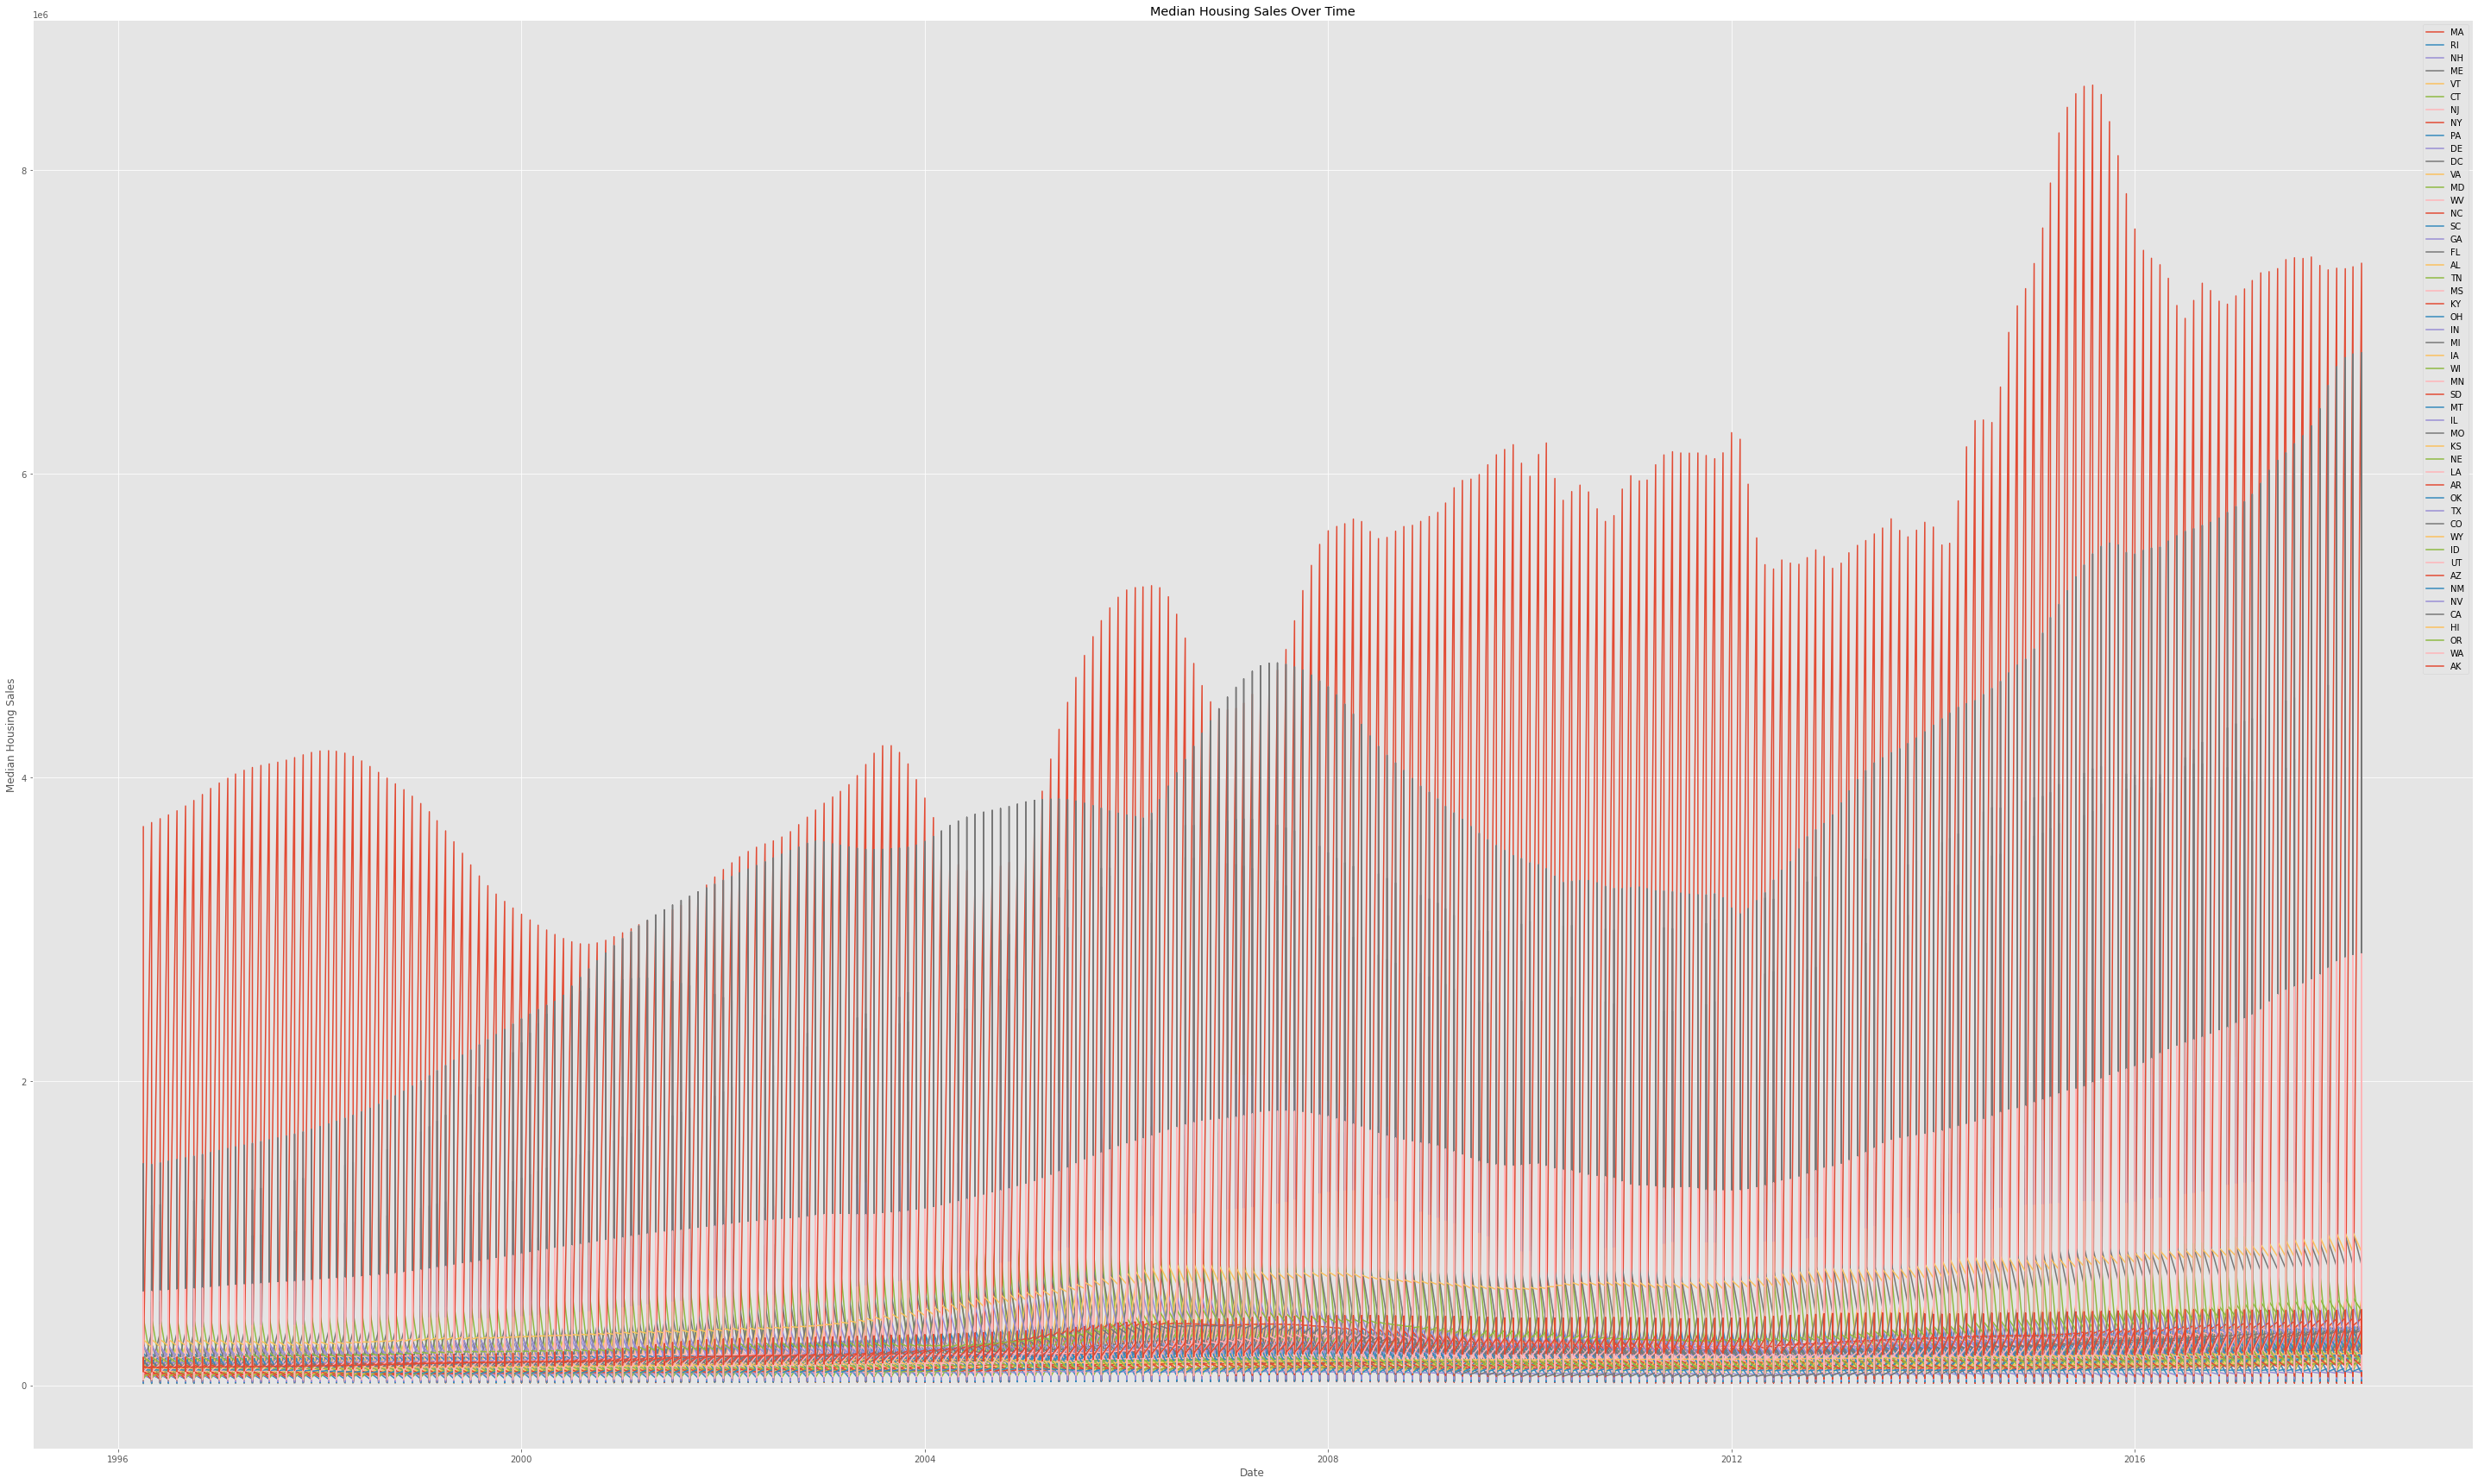

In [232]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 24))

# Plotting
for region in final_df['State'].unique():
    data = final_df[final_df['State'] == region]
    plt.plot(data['Date'], data['MedianHousingSales'], label=region)

plt.xlabel('Date')
plt.ylabel('Median Housing Sales')
plt.title('Median Housing Sales Over Time')
plt.legend()
plt.tight_layout()  # Ensures proper spacing of the plot elements
plt.savefig('housesales.png', dpi=200, bbox_inches='tight')



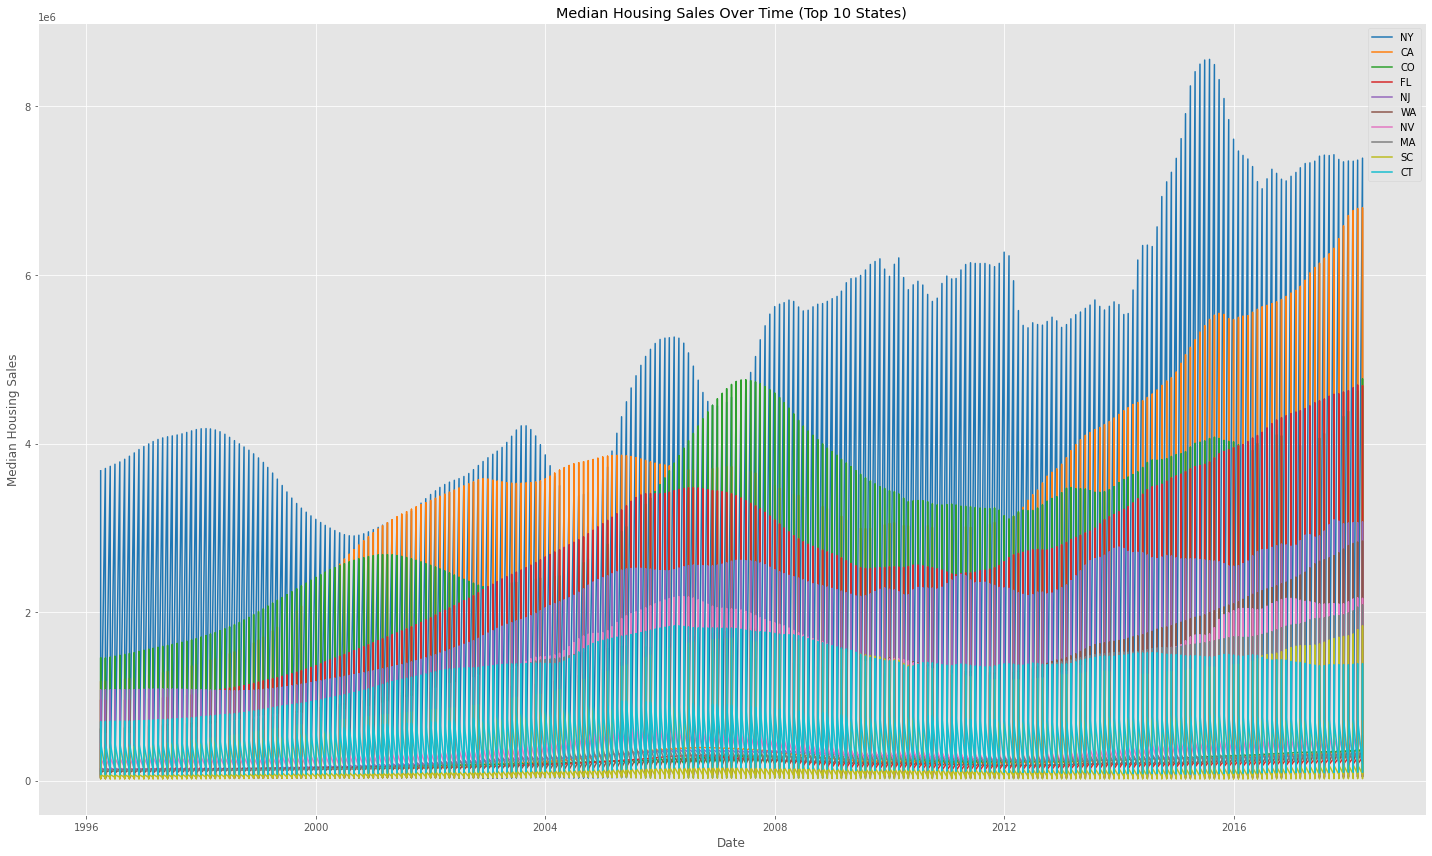

In [262]:
import matplotlib.pyplot as plt

# Sort the final_df dataframe by median housing sales in descending order
sorted_df = final_df.sort_values(by='MedianHousingSales', ascending=False)

# Get the top 10 states by median housing sales
top_10_states = sorted_df['State'].unique()[:10]

# Plotting
plt.figure(figsize=(20, 12))
for region in top_10_states:
    data = final_df[final_df['State'] == region]
    plt.plot(data['Date'], data['MedianHousingSales'], label=region)

plt.xlabel('Date')
plt.ylabel('Median Housing Sales')
plt.title('Median Housing Sales Over Time (Top 10 States)')
plt.legend()
plt.tight_layout()  
plt.savefig('housesales.png', dpi=200, bbox_inches='tight')


In [340]:
from PIL import Image
# img = Image.open('housesales.png')
img = Image.open('Median_house_DC.png')

img.show()


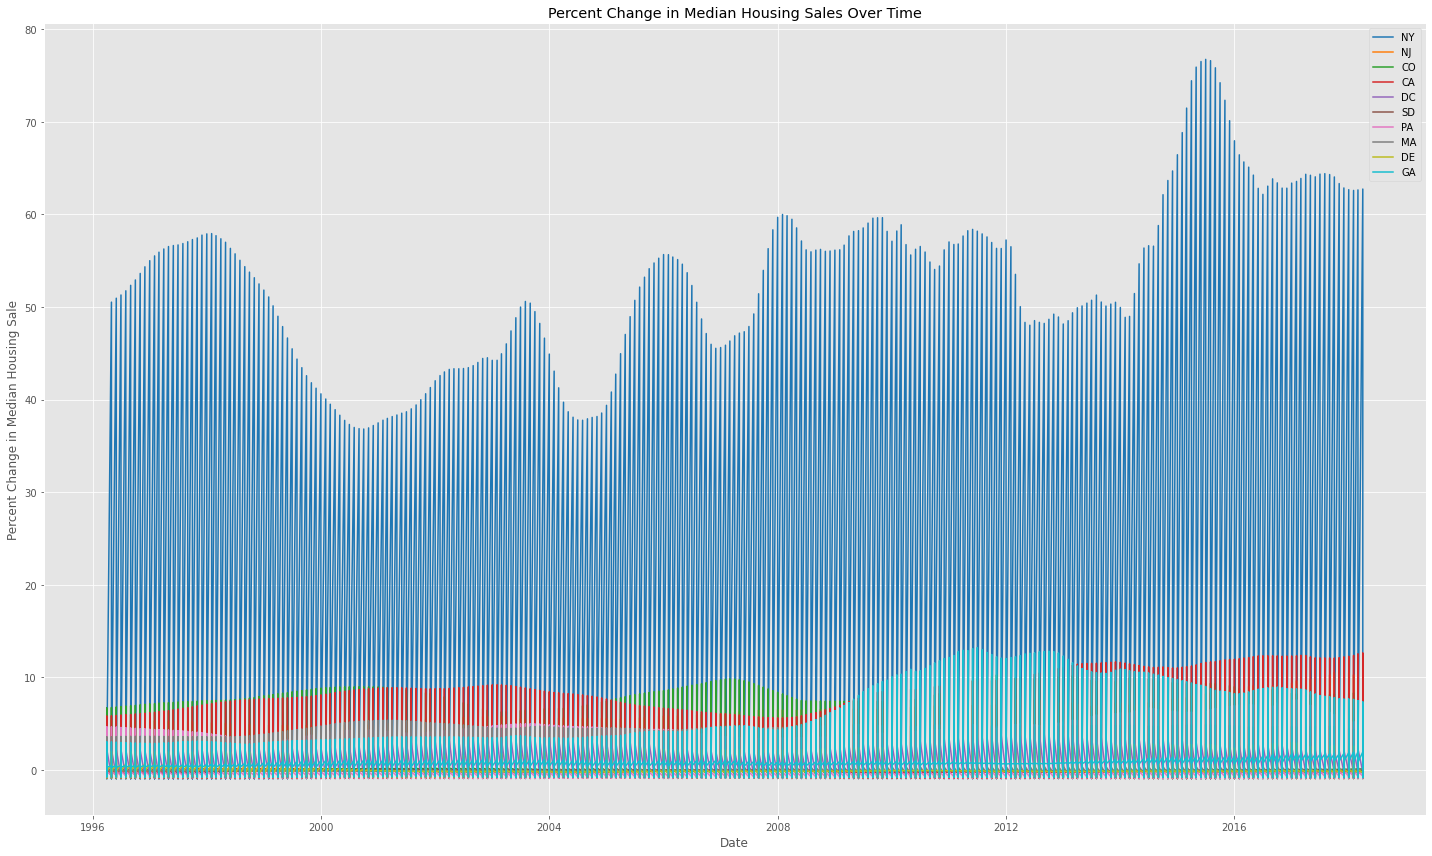

In [268]:
import matplotlib.pyplot as plt

# Calculate the percent change in median housing sales for each year
final_df['PercentChange'] = final_df.groupby('State')['MedianHousingSales'].pct_change()

# Sort the final_df dataframe by median housing sales in descending order
sorted_df = final_df.sort_values(by='pct_change', ascending=False)

# Get the top 10 states by median housing sales
top_10_states = sorted_df['State'].unique()[:10]

# Plotting
plt.figure(figsize=(20, 12))
for region in top_10_states:
    data = final_df[final_df['State'] == region]
    plt.plot(data['Date'], data['PercentChange'], label=region)

plt.xlabel('Date')
plt.ylabel('Percent Change in Median Housing Sale')
plt.title('Percent Change in Median Housing Sales Over Time')
plt.legend()
plt.tight_layout()  
plt.savefig('percent_change2.png', dpi=200, bbox_inches='tight')


In [294]:
top_10_states = sorted_df['State'].unique()[:10]
top_10_states

array(['NY', 'NJ', 'CO', 'CA', 'DC', 'SD', 'PA', 'MA', 'DE', 'GA'],
      dtype=object)

In [302]:
data[data['Date'] > '2017']

Date  RegionID  zipcode        City State       Metro  \
3226853 2017-02-01     66125    20001  Washington    DC  Washington   
3226854 2017-02-01     66126    20002  Washington    DC  Washington   
3226855 2017-02-01     66127    20003  Washington    DC  Washington   
3226856 2017-02-01     66131    20007  Washington    DC  Washington   
3226857 2017-02-01     66132    20008  Washington    DC  Washington   
3226858 2017-02-01     66133    20009  Washington    DC  Washington   
3226859 2017-02-01     66134    20010  Washington    DC  Washington   
3226860 2017-02-01     66135    20011  Washington    DC  Washington   
3226861 2017-02-01     66136    20012  Washington    DC  Washington   
3226862 2017-02-01     66138    20015  Washington    DC  Washington   
3226863 2017-02-01     66139    20016  Washington    DC  Washington   
3226864 2017-02-01     66140    20017  Washington    DC  Washington   
3226865 2017-02-01     66141    20018  Washington    DC  Washington   
3226866 2017-02-01     66142    20019  Washington    DC  Washington   
3226867 2017-02-01     66143    20020  Washington    DC  Washington   
3226868 2017-02-01     66146    20024  Washington    DC  Washington   
3226869 2017-02-01     66151    20032  Washington    DC  Washington   
3226870 2017-02-01     66155    20037  Washington    DC  Washington   
3239748 2017-03-01     66125    20001  Washington    DC  Washington   
3239749 2017-03-01     66126    20002  Washington    DC  Washington   
3239750 2017-03-01     66127    20003  Washington    DC  Washington   
3239751 2017-03-01     66131    20007  Washington    DC  Washington   
3239752 2017-03-01     66132    20008  Washington    DC  Washington   
3239753 2017-03-01     66133    20009  Washington    DC  Washington   
3239754 2017-03-01     66134    20010  Washington    DC  Washington   
3239755 2017-03-01     66135    20011  Washington    DC  Washington   
3239756 2017-03-01     66136    20012  Washington    DC  Washington   
3239757 2017-03-01     66138    20015  Washington    DC  Washington   
3239758 2017-03-01     66139    20016  Washington    DC  Washington   
3239759 2017-03-01     66140    20017  Washington    DC  Washington   
3239760 2017-03-01     66141    20018  Washington    DC  Washington   
3239761 2017-03-01     66142    20019  Washington    DC  Washington   
3239762 2017-03-01     66143    20020  Washington    DC  Washington   
3239763 2017-03-01     66146    20024  Washington    DC  Washington   
3239764 2017-03-01     66151    20032  Washington    DC  Washington   
3239765 2017-03-01     66155    20037  Washington    DC  Washington   
3252643 2017-04-01     66125    20001  Washington    DC  Washington   
3252644 2017-04-01     66126    20002  Washington    DC  Washington   
3252645 2017-04-01     66127    20003  Washington    DC  Washington   
3252646 2017-04-01     66131    20007  Washington    DC  Washington   
3252647 2017-04-01     66132    20008  Washington    DC  Washington   
3252648 2017-04-01     66133    20009  Washington    DC  Washington   
3252649 2017-04-01     66134    20010  Washington    DC  Washington   
3252650 2017-04-01     66135    20011  Washington    DC  Washington   
3252651 2017-04-01     66136    20012  Washington    DC  Washington   
3252652 2017-04-01     66138    20015  Washington    DC  Washington   
3252653 2017-04-01     66139    20016  Washington    DC  Washington   
3252654 2017-04-01     66140    20017  Washington    DC  Washington   
3252655 2017-04-01     66141    20018  Washington    DC  Washington   
3252656 2017-04-01     66142    20019  Washington    DC  Washington   
3252657 2017-04-01     66143    20020  Washington    DC  Washington   
3252658 2017-04-01     66146    20024  Washington    DC  Washington   
3252659 2017-04-01     66151    20032  Washington    DC  Washington   
3252660 2017-04-01     66155    20037  Washington    DC  Washington   
3265538 2017-05-01     66125    20001  Washington    DC  Washington   
3265539 2017-05-01     66126    20002 

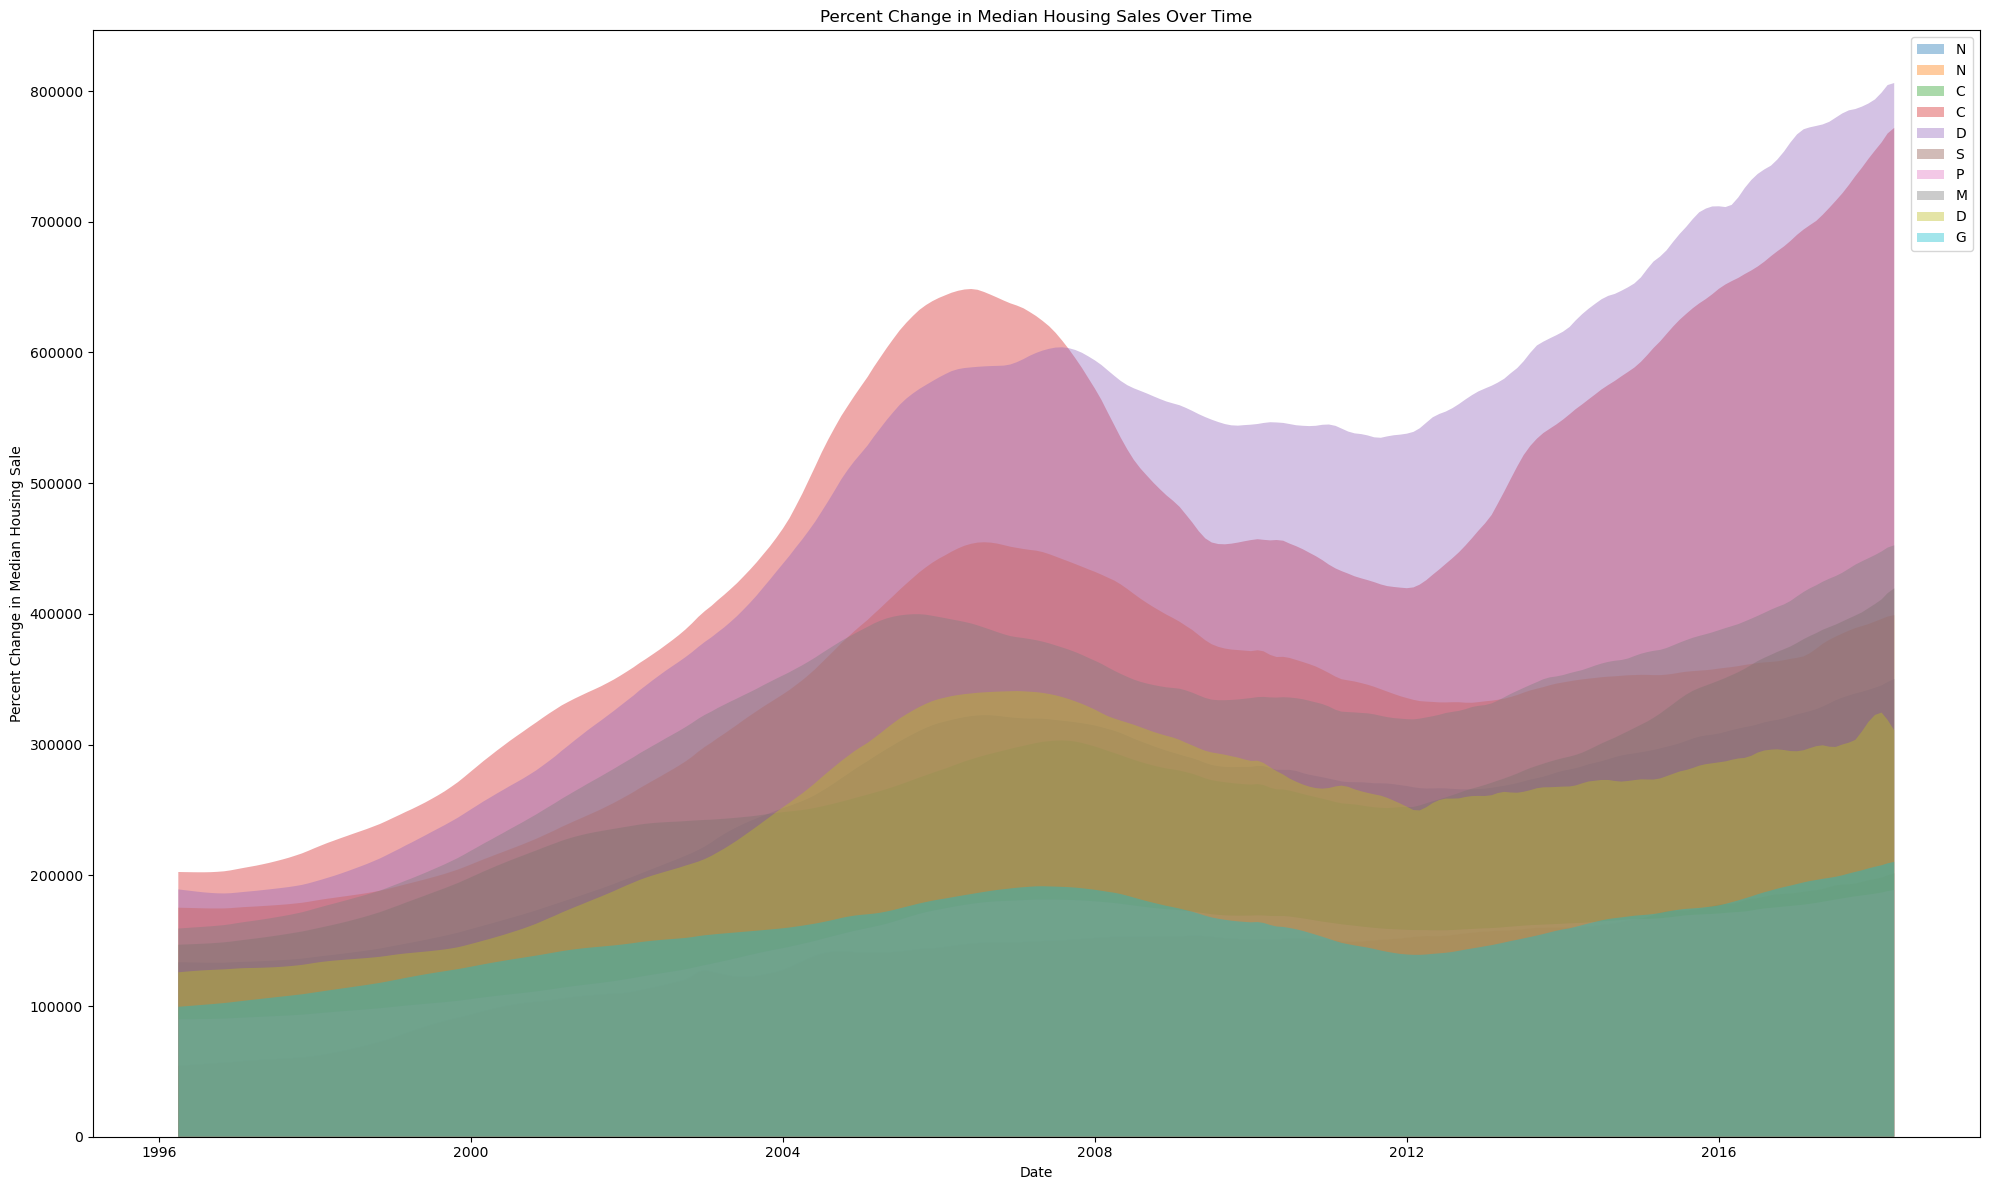

In [349]:
import matplotlib.pyplot as pl
import matplotlib.cm as cm

# Calculate the percent change in median housing sales for each year
final_df['PercentChange'] = final_df.groupby('State')['MedianHousingSales'].mean().pct_change()

# Sort the final_df dataframe by median housing sales in descending order
sorted_df = final_df.sort_values(by='pct_change', ascending=False)

# colors = cm.tab10(np.linspace(0, 1, 10))

# Set the new default color for the plot
# plt.style.use('dark_background')
plt.style.use('default')

# Get the top 10 states by median housing sales
# top_10_states = ['DC']
top_10_states = sorted_df['State'].unique()[:10]

# Plotting
plt.figure(figsize=(20, 12))
for region in top_10_states:
#     data = final_df[final_df['State'] == region]
    data = final_df[final_df['State'] == region].groupby('Date').mean().reset_index()
 
    plt.stackplot(data['Date'], data['MedianHousingSales'], alpha=0.4, labels=region)#, label=region)

plt.xlabel('Date')
plt.ylabel('Percent Change in Median Housing Sale')
plt.title('Percent Change in Median Housing Sales Over Time')
plt.legend()
plt.tight_layout()
plt.savefig('Median_house_DC.png', dpi=200, bbox_inches='tight')


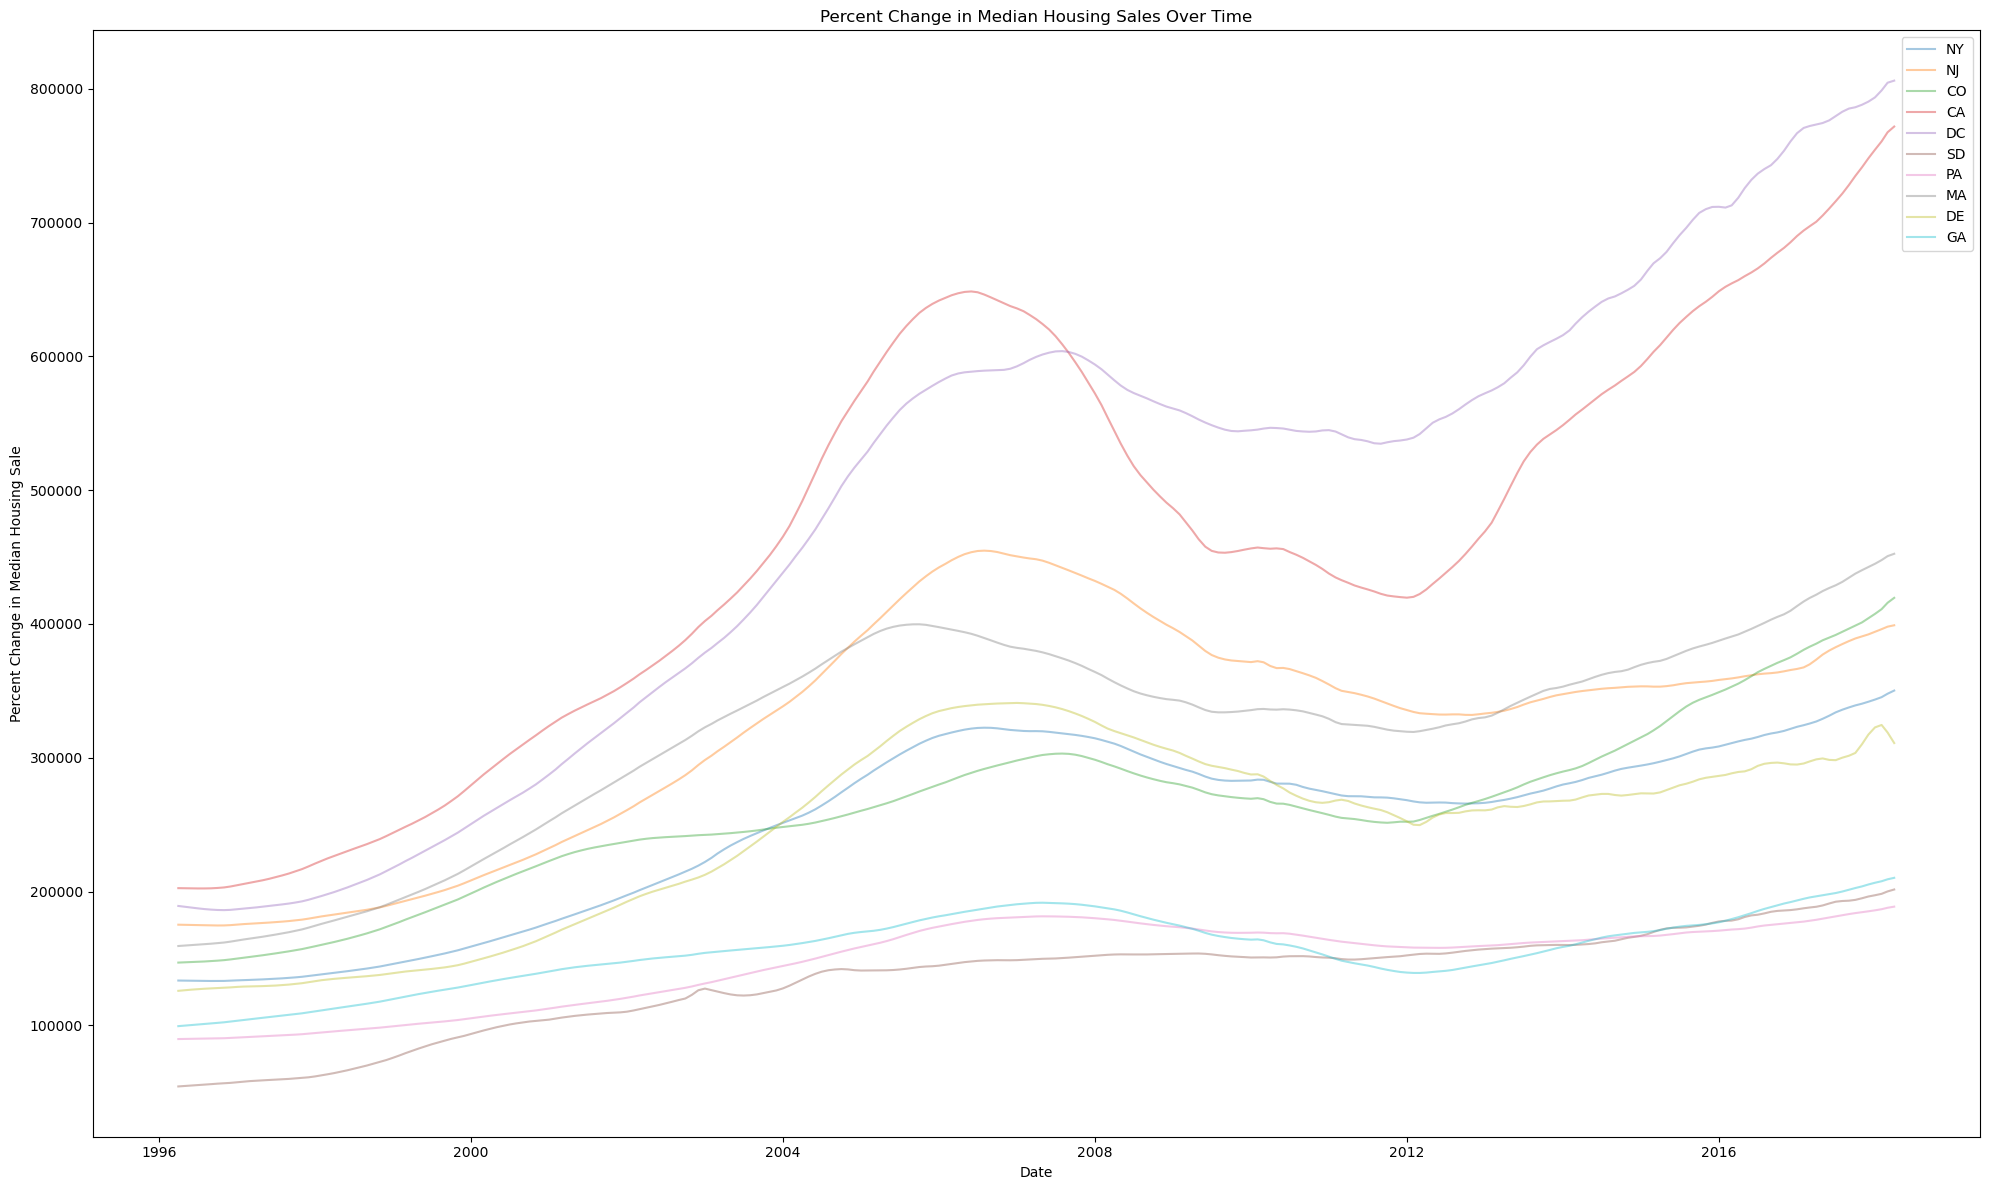

In [350]:
import matplotlib.pyplot as pl
import matplotlib.cm as cm

# Calculate the percent change in median housing sales for each year
final_df['PercentChange'] = final_df.groupby('State')['MedianHousingSales'].mean().pct_change()

# Sort the final_df dataframe by median housing sales in descending order
sorted_df = final_df.sort_values(by='pct_change', ascending=False)

# colors = cm.tab10(np.linspace(0, 1, 10))

# Set the new default color for the plot
# plt.style.use('dark_background')
plt.style.use('default')

# Get the top 10 states by median housing sales
# top_10_states = ['DC']
top_10_states = sorted_df['State'].unique()[:10]

# Plotting
plt.figure(figsize=(20, 12))
for region in top_10_states:
#     data = final_df[final_df['State'] == region]
    data = final_df[final_df['State'] == region].groupby('Date').mean().reset_index()
 
    plt.plot(data['Date'], data['MedianHousingSales'], alpha=0.4, label=region)

plt.xlabel('Date')
plt.ylabel('Percent Change in Median Housing Sale')
plt.title('Percent Change in Median Housing Sales Over Time')
plt.legend()
plt.tight_layout()
plt.savefig('Median_house_DC.png', dpi=200, bbox_inches='tight')

In [319]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


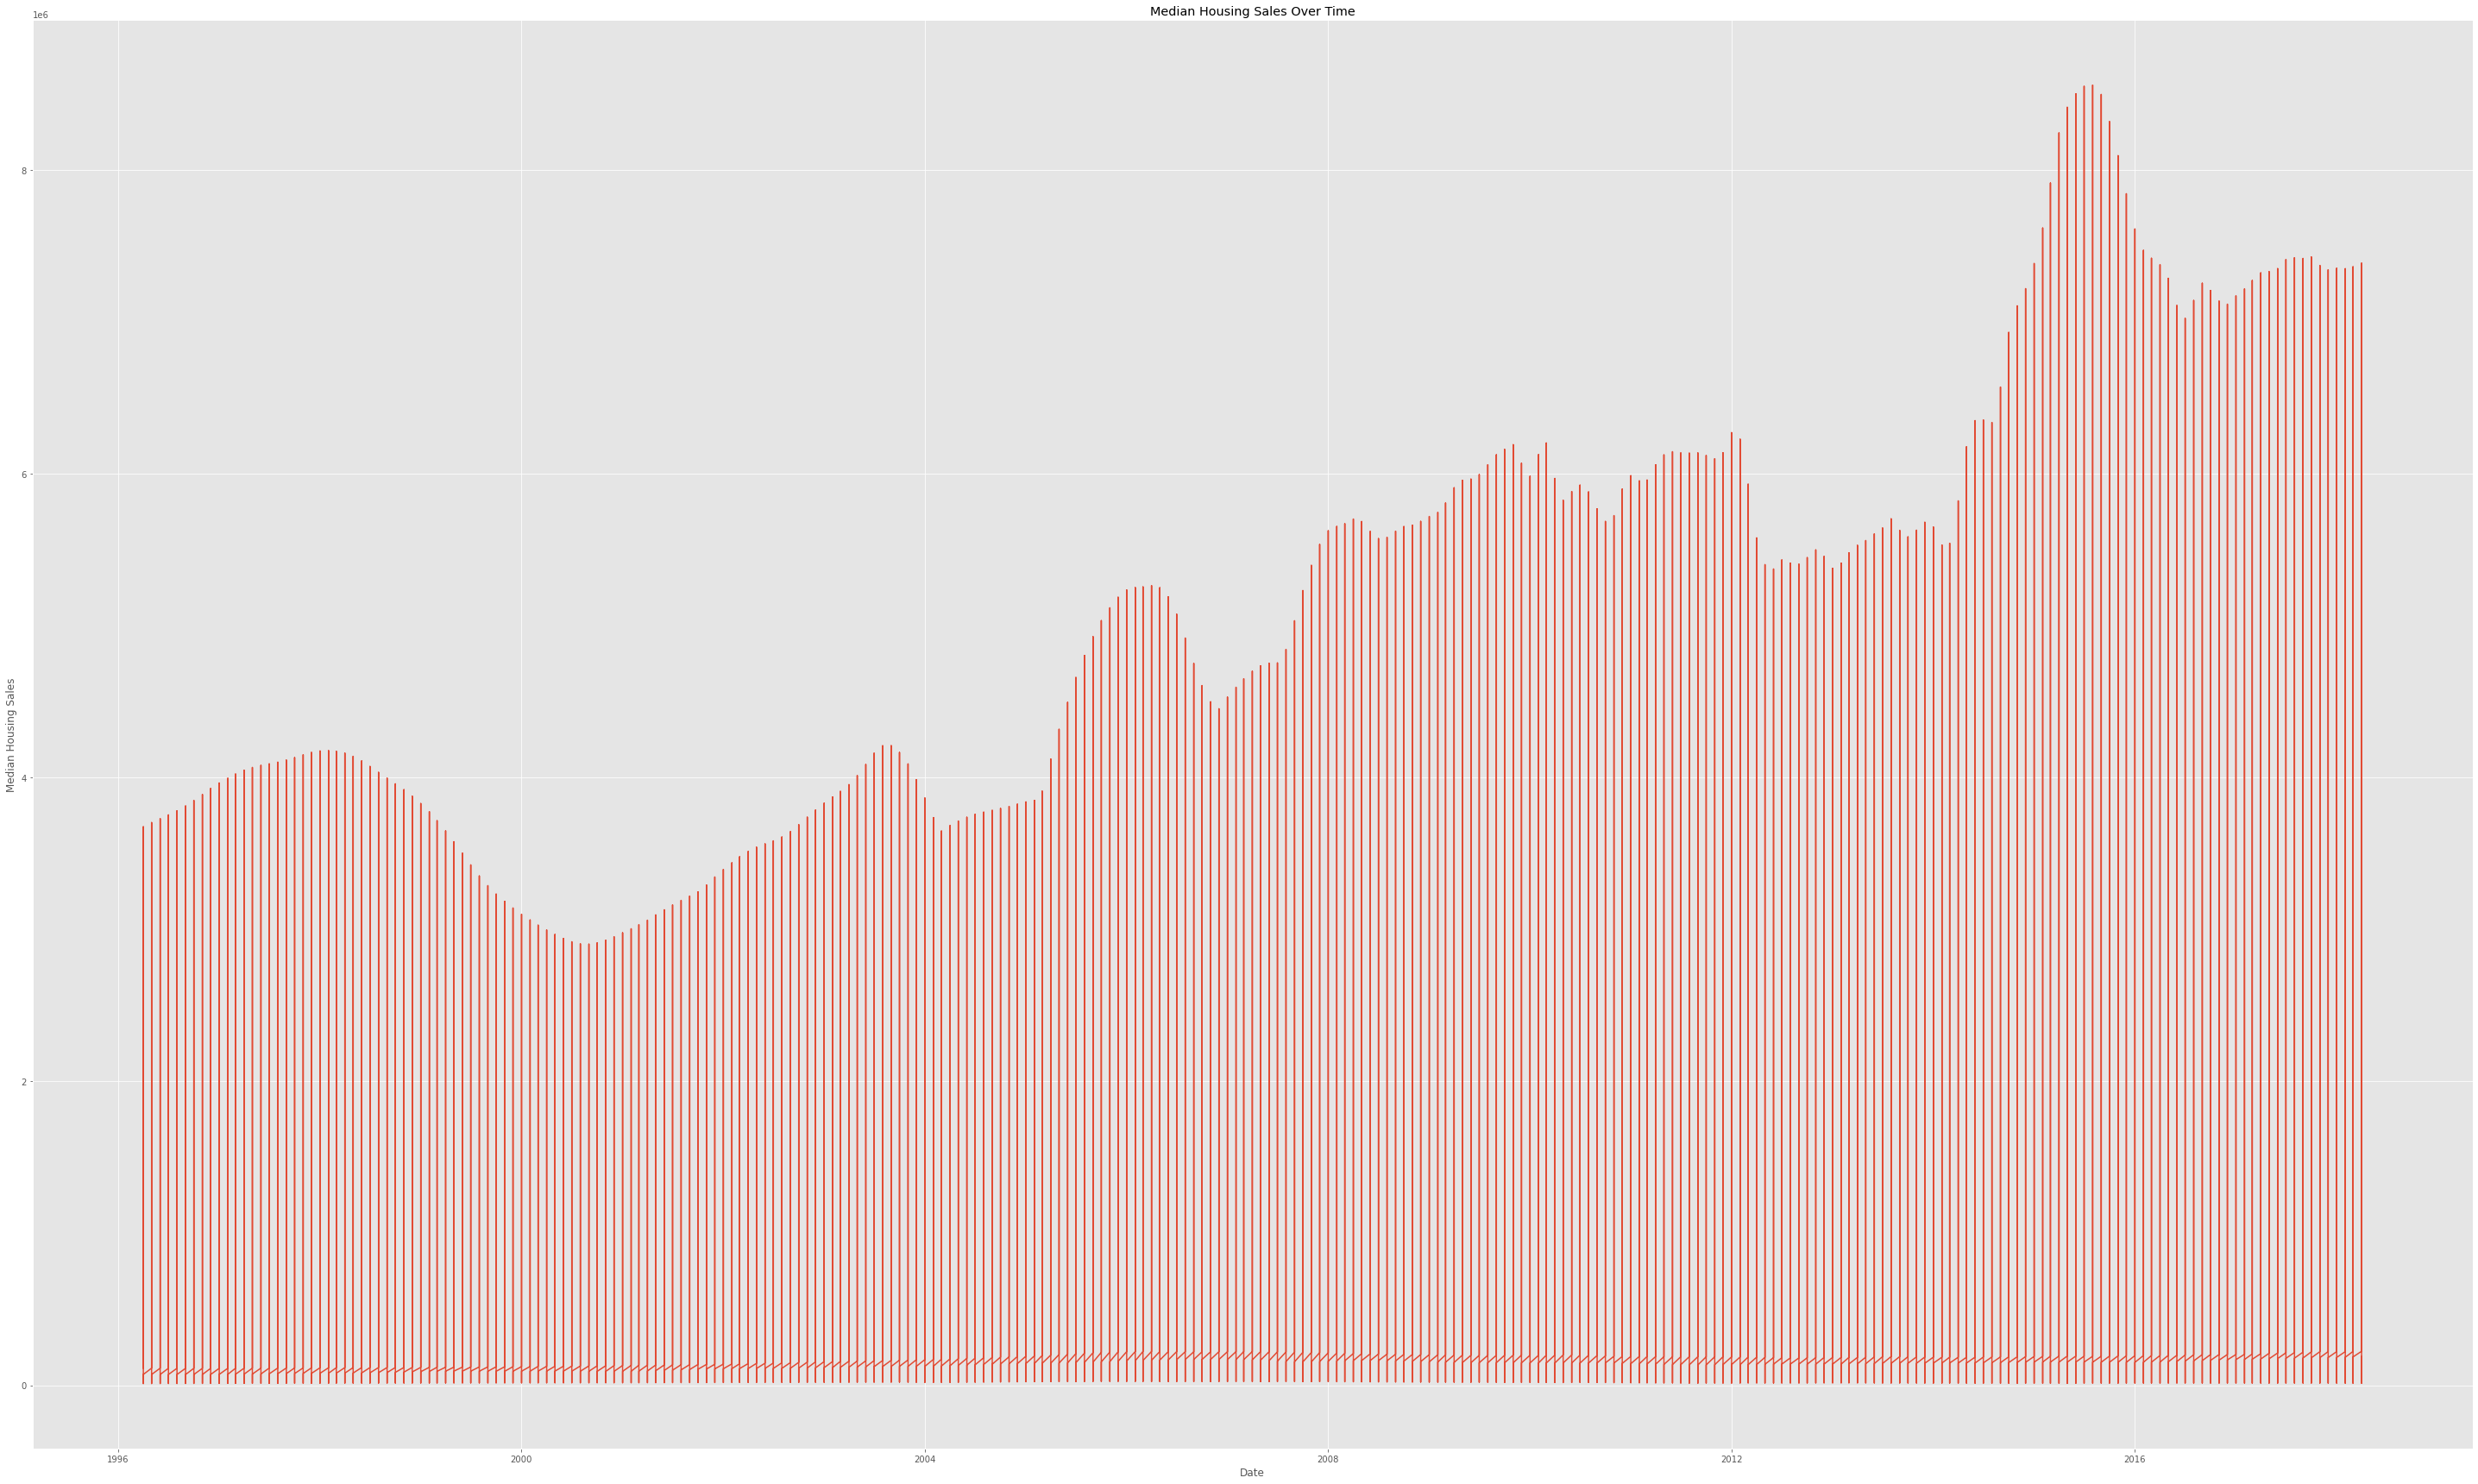

In [220]:
plt.figure(figsize=(40, 24))

# Plotting
plt.plot(final_df['Date'], final_df['MedianHousingSales'])

plt.xlabel('Date')
plt.ylabel('Median Housing Sales')
plt.title('Median Housing Sales Over Time')
plt.tight_layout()  # Ensures proper spacing of the plot elements
plt.show()

In [351]:
# # Plotting
# plt.figure(figsize=(30, 18))
# plt.boxplot([final_df[final_df['Date'] == date]['MedianHousingSales'] for date in final_df['Date'].unique()],
#             labels=final_df['Date'].unique())

# plt.xlabel('Date')
# plt.ylabel('Median Housing Sales')
# plt.title('Distribution of Median Housing Sales for Each Month')
# plt.xticks(rotation=45)
# plt.show()


In [352]:
# import seaborn as sns

# # Pivot the data to create a pivot table with Date as index, RegionName as columns, and MedianHousingSales as values
# pivot_df = final_df.pivot(index='Date', columns='RegionName', values='MedianHousingSales')

# # Plotting
# plt.figure(figsize=(30, 16))
# sns.heatmap(pivot_df, cmap='YlGnBu')

# plt.xlabel('Region')
# plt.ylabel('Date')
# plt.title('Median Housing Sales Heatmap')
# plt.show()


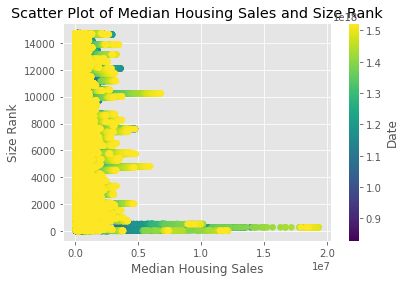

In [16]:
# Plotting
plt.scatter(final_df['MedianHousingSales'], final_df['SizeRank'], c=final_df['Date'], cmap='viridis')

plt.xlabel('Median Housing Sales')
plt.ylabel('Size Rank')
plt.title('Scatter Plot of Median Housing Sales and Size Rank')
plt.colorbar(label='Date')
plt.show()


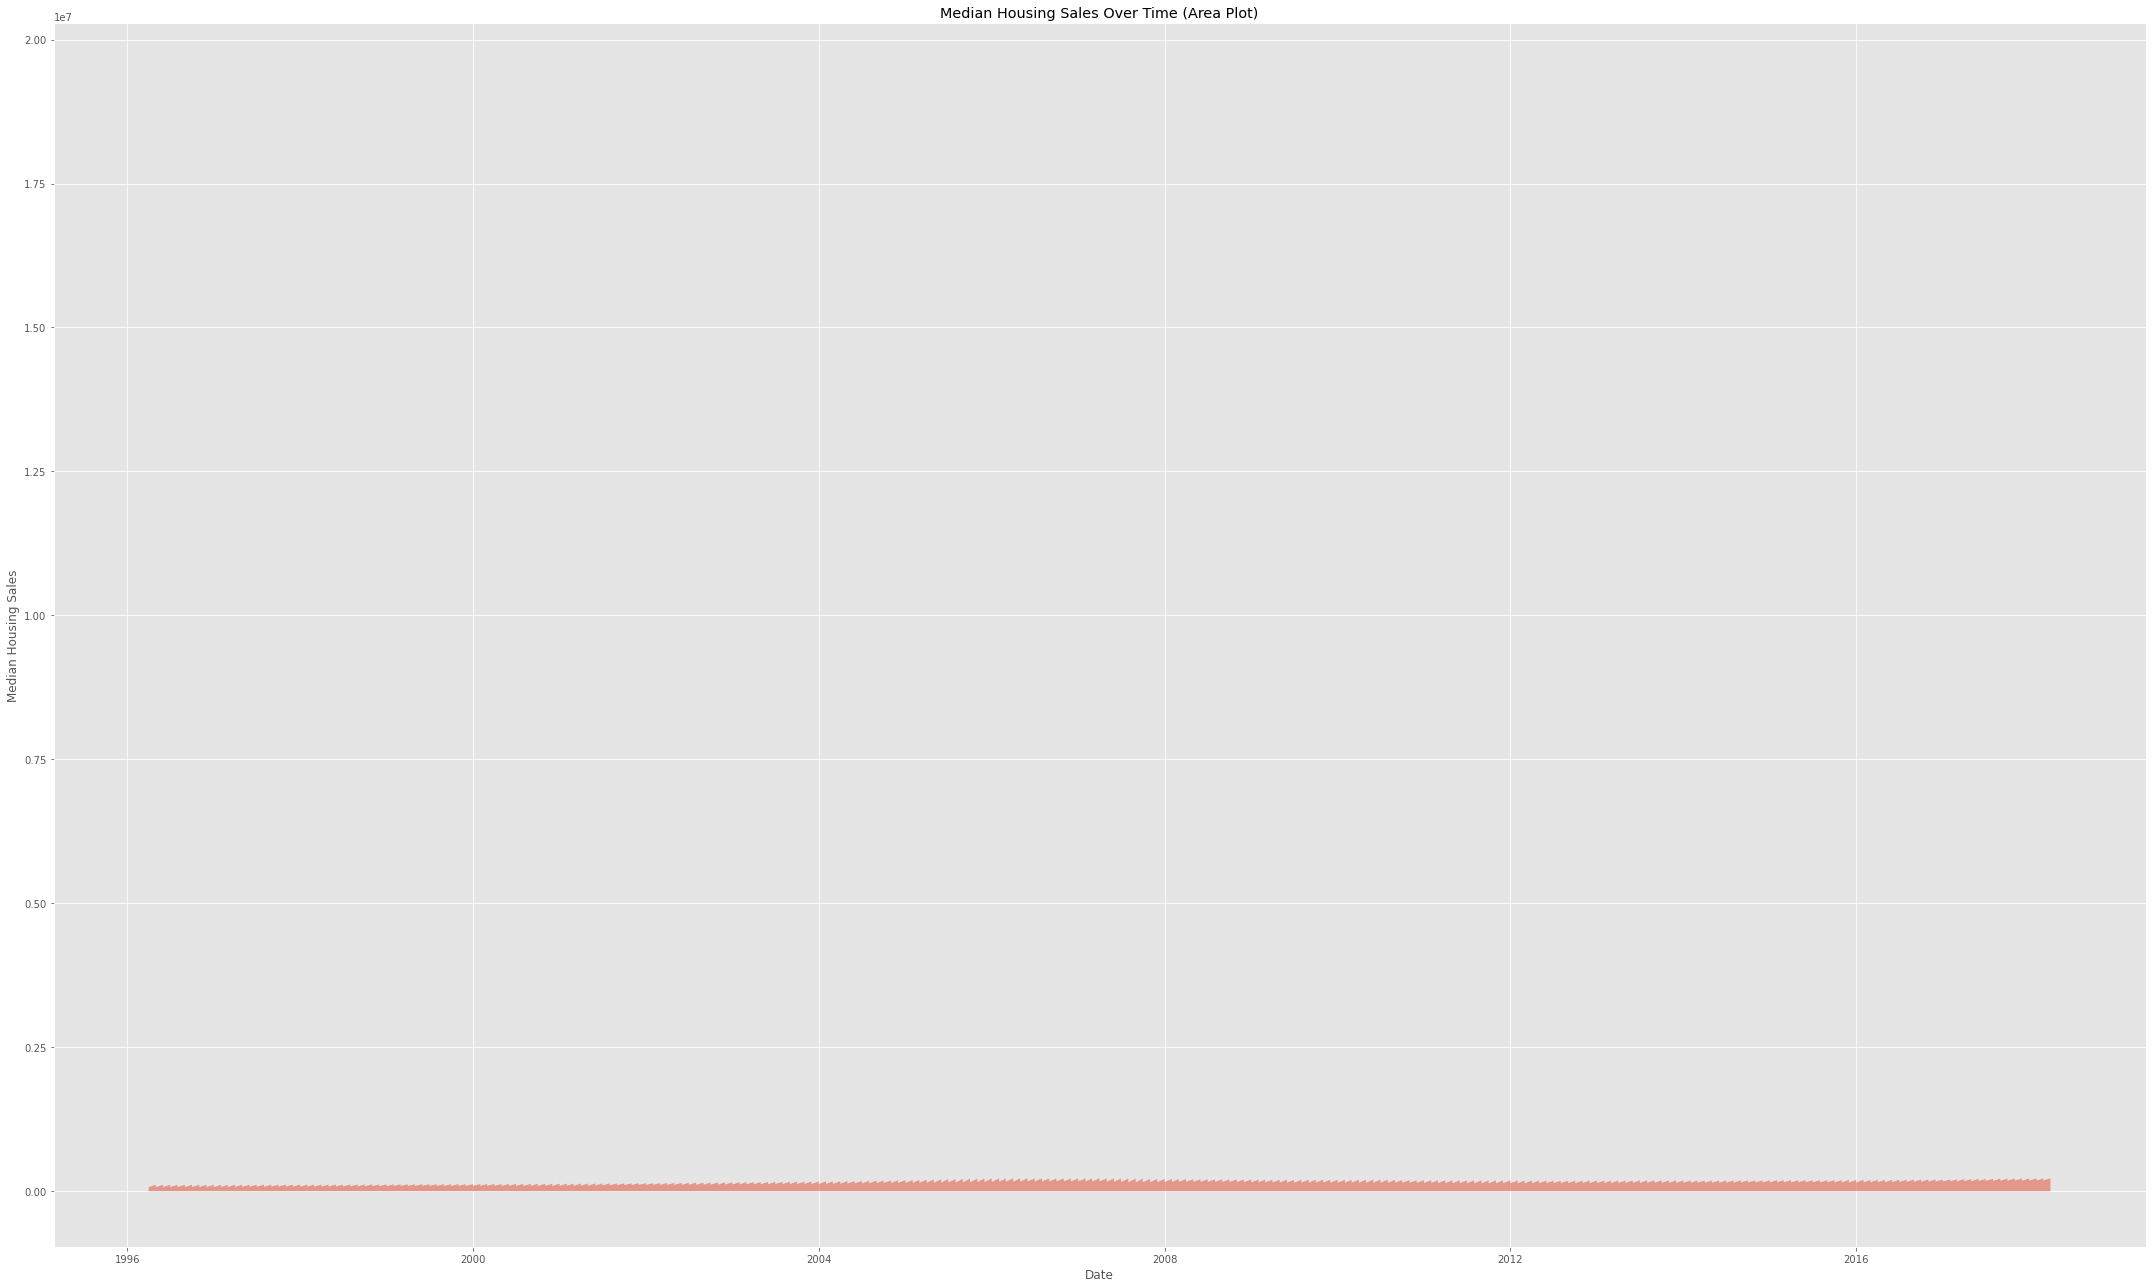

In [27]:
plt.figure(figsize=(30, 18))
plt.fill_between(final_df['Date'], final_df['MedianHousingSales'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Median Housing Sales')
plt.title('Median Housing Sales Over Time (Area Plot)')
plt.tight_layout()
plt.show()

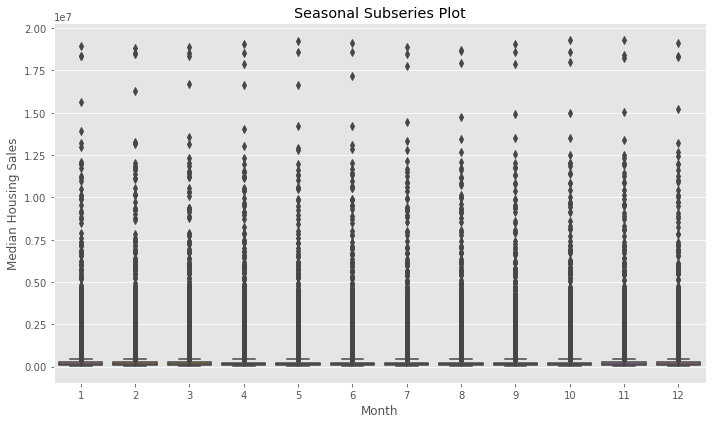

In [28]:

final_df['Month'] = final_df['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='MedianHousingSales', data=final_df)
plt.xlabel('Month')
plt.ylabel('Median Housing Sales')
plt.title('Seasonal Subseries Plot')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(final_df['Date'], final_df['MedianHousingSales'])
plt.xlabel('Date')
plt.ylabel('Median Housing Sales')
plt.title('Median Housing Sales Over Time (Bar Plot)')
plt.tight_layout()
plt.show()

# Step 5: ARIMA Modeling

In [356]:
from statsmodels.tsa.arima.model import ARIMA
def pdq_fitting(data, convergenceWarning=True, summary=False):
    import warnings
    from statsmodels.tools.sm_exceptions import ConvergenceWarning
    '''
    Function loops through finding the best p, d, q sequence
    convergenceWarning: True = ignore convergence warnings, False = don't ignore
    Summary: print for each pdq check
    '''
    results = []
    for p in range(5):
        for d in range(5):
            for q in range(5):
                # try, except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergenceWarning: 
                            warnings.simplefilter("ignore", ConvergenceWarning)
                        model = ARIMA(data, order=(p, d, q)).fit()
                    # If there is a warning, remove
                    if warn: 
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    # No Warning, keep
                    else:    
                        air_score = model.aic
                        results.append((air_score, p, d, q))
                        if summary:
                            print("P of: ",p)
                            print("d of: ",d)
                            print("q of: ",q)
                            print("AIR score: ", air_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    print("Best p, d, q for lowest AIR score: ")
    print("P of: ", results[0][1])
    print("d of: ", results[0][2])
    print("q of: ", results[0][3])

In [362]:
selected_states = ['DC', 'NY', 'CO']
limited_df = final_df[final_df['State'].isin(selected_states)]
# pdq_fitting(limited_df['MedianHousingSales'], summary=True)

In [365]:
limited_df['MedianHousingSales']

1364       3676700.0
1365        175800.0
1366        135900.0
1367        129800.0
1368        157500.0
             ...    
3417113     445000.0
3417114     355300.0
3417115     274300.0
3417147     316300.0
3417148     343200.0
Name: MedianHousingSales, Length: 312965, dtype: float64

In [ ]:
def stationary(*args):
    pv = []
    for data in args:
        if adfuller(data)[1]< .05:
            print(f'{adfuller(data)[1]< .05} With a pvlaue of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False}\n')
    if pv:
        print(min(pv))
stationary(daily_ts, differenced_ts, differenced_transformed_ts

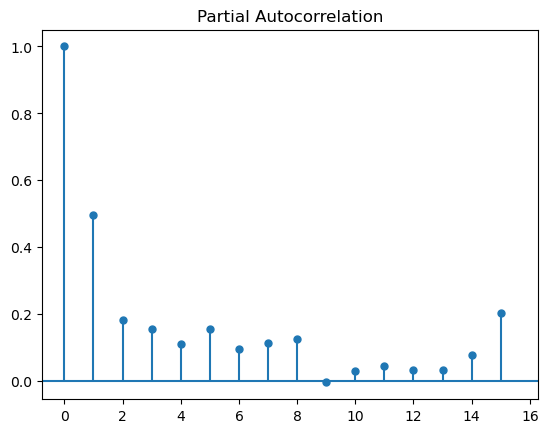

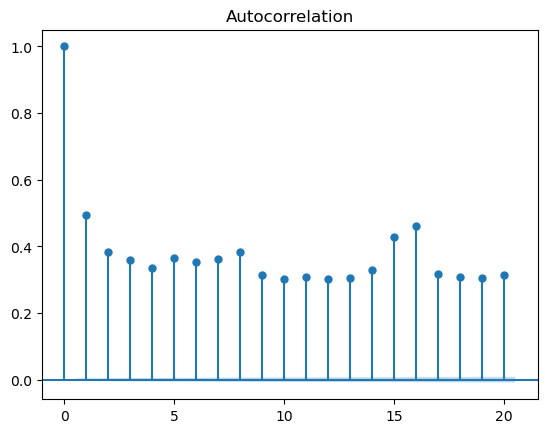

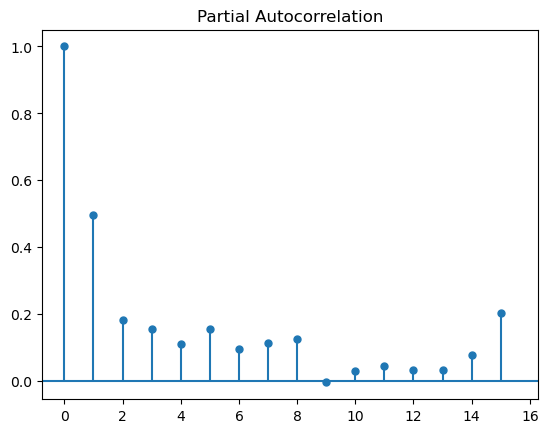

In [366]:
# Plot the ACF
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(limited_df['MedianHousingSales'], lags=20)
plot_pacf(limited_df['MedianHousingSales'],lags=15, method='ywm')

In [ ]:
def ts_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data_diff,order= pdq).fit()
    print(arma.mle_retvals)
    print(arma.summary())
    display(arma.plot_diagnostics(figsize=(16, 8)))


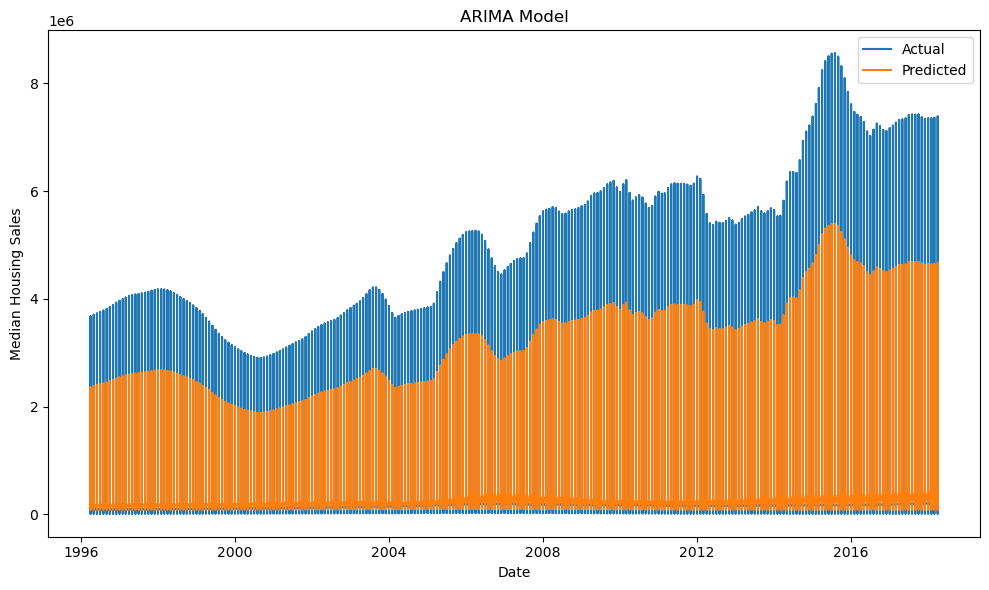

In [360]:
model = ARIMA(final_df['MedianHousingSales'], order=(1, 0, 0))
model_fit = model.fit()

# Generate predictions
predictions = model_fit.predict(start=0, end=len(final_df)-1)

# Plot the original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(final_df['Date'], final_df['MedianHousingSales'], label='Actual')
plt.plot(final_df['Date'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Median Housing Sales')
plt.title('ARIMA Model')
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Interpreting Results